## Анализ популярности игр интернет магазина
---

### Цель исследования
Выявить определяющие успешность игры закономерности

### Объект исследования
Набор данных по играм за 2016 год предоставленный отделом маркетинга

### Результат исследования
Выявлены потенциально успешные продукты для планирования рекламных кампаний на 2017 год

### Ход исследования
Для исследования отделом маркетинга был предоставлен следующий набор данных:
```python  
'games.csv'
```
Предварительная информация о чистоте данных отсутствует, поэтому, первым шагом будет проведено изучение данных на предмет наличия ошибок, отсутствия информации и ее корректности . После чего будет проведена предобработка этих данных. Далее будет проведен исследовательский анализ данных с целью выявления закономерностей и формирование портрета пользователя по каждому региону. Следующим шагом будет проведена проверка следующих гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

В конце будет написан общий вывод и даны рекомендации.

Следовательно, исследование будет состоять из 6 этапов:
1. Изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Формирование портрета пользователя по каждому региона
5. Проверка гипотез
6. Общий вывод
___

## Настройки пространства
---

### Импорт библиотек
---

In [1]:
# Стандартные библиотеки
import warnings

# Сторонние библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

# Дефолтные настройки
sns.set_palette('Purples_r')
sns.set_theme(style='darkgrid', palette='Purples_r')
warnings.filterwarnings('ignore')

### Настройка констант
---

In [2]:
# Настройки графиков
### Палитры цветов
PALETTE_CAT = 'coolwarm_r'
PALETTE_CAT_ALT = 'coolwarm'
PALETTE_NUMERIC = 'Purples'
PALETTE_NUMERIC_ALT = 'Purples_r'
PALETTE_GREY = 'Greys'

### Одиночные цвета
COLORS_SINGLE_MAIN = sns.color_palette(PALETTE_NUMERIC, n_colors=6)
COLOR_SINGLE_BASIC = COLORS_SINGLE_MAIN[2]

COLORS_SINGLE_GREY = sns.color_palette(PALETTE_GREY, n_colors=6)
COLOR_SINGLE_GREY_BASIC = COLORS_SINGLE_GREY[2]

### Размеры фигур
FIGSIZE_SINGLE = dict(figsize=(18, 6))
FIGSIZE_GRID = dict(figsize=(18, 14))

### Шрифты
FIG_SUPTITLE_KWARGS = dict(
    y=1,
    size=16,
    weight='bold'
)

FIG_SUPTITLE_KWARGS = dict(
    y=1,
    size=16,
    weight='bold'
)

### Лейблы
LABELS_NUM = dict(
    xlabel='Значение',
    ylabel='Количество'
)

LABELS_CAT = dict(
    xlabel='Значение',
    ylabel='Количество'
)

Y_CAPTION_NUMERIC_FREQ = 'Частота'
Y_CAPTION_NUMERIC_DIST = 'Плотность'

### Общие стилистические настройки
BINS = 30
ALPHA_FILL = 0.6

## Изучение данных
---

### Изучение данных
---

In [3]:
# Загрузка данных
df = pd.read_csv('games.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Просмотр общей информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Провекра на наличие пропущенных значений
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Проверка на явные дубликаты
df.duplicated().sum()

np.int64(0)

In [7]:
# Проверка на неявные дубликаты
df[df.duplicated(subset=['Name', 'Year_of_Release', 'Platform'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [8]:
# Проверка уникальных значений
df.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

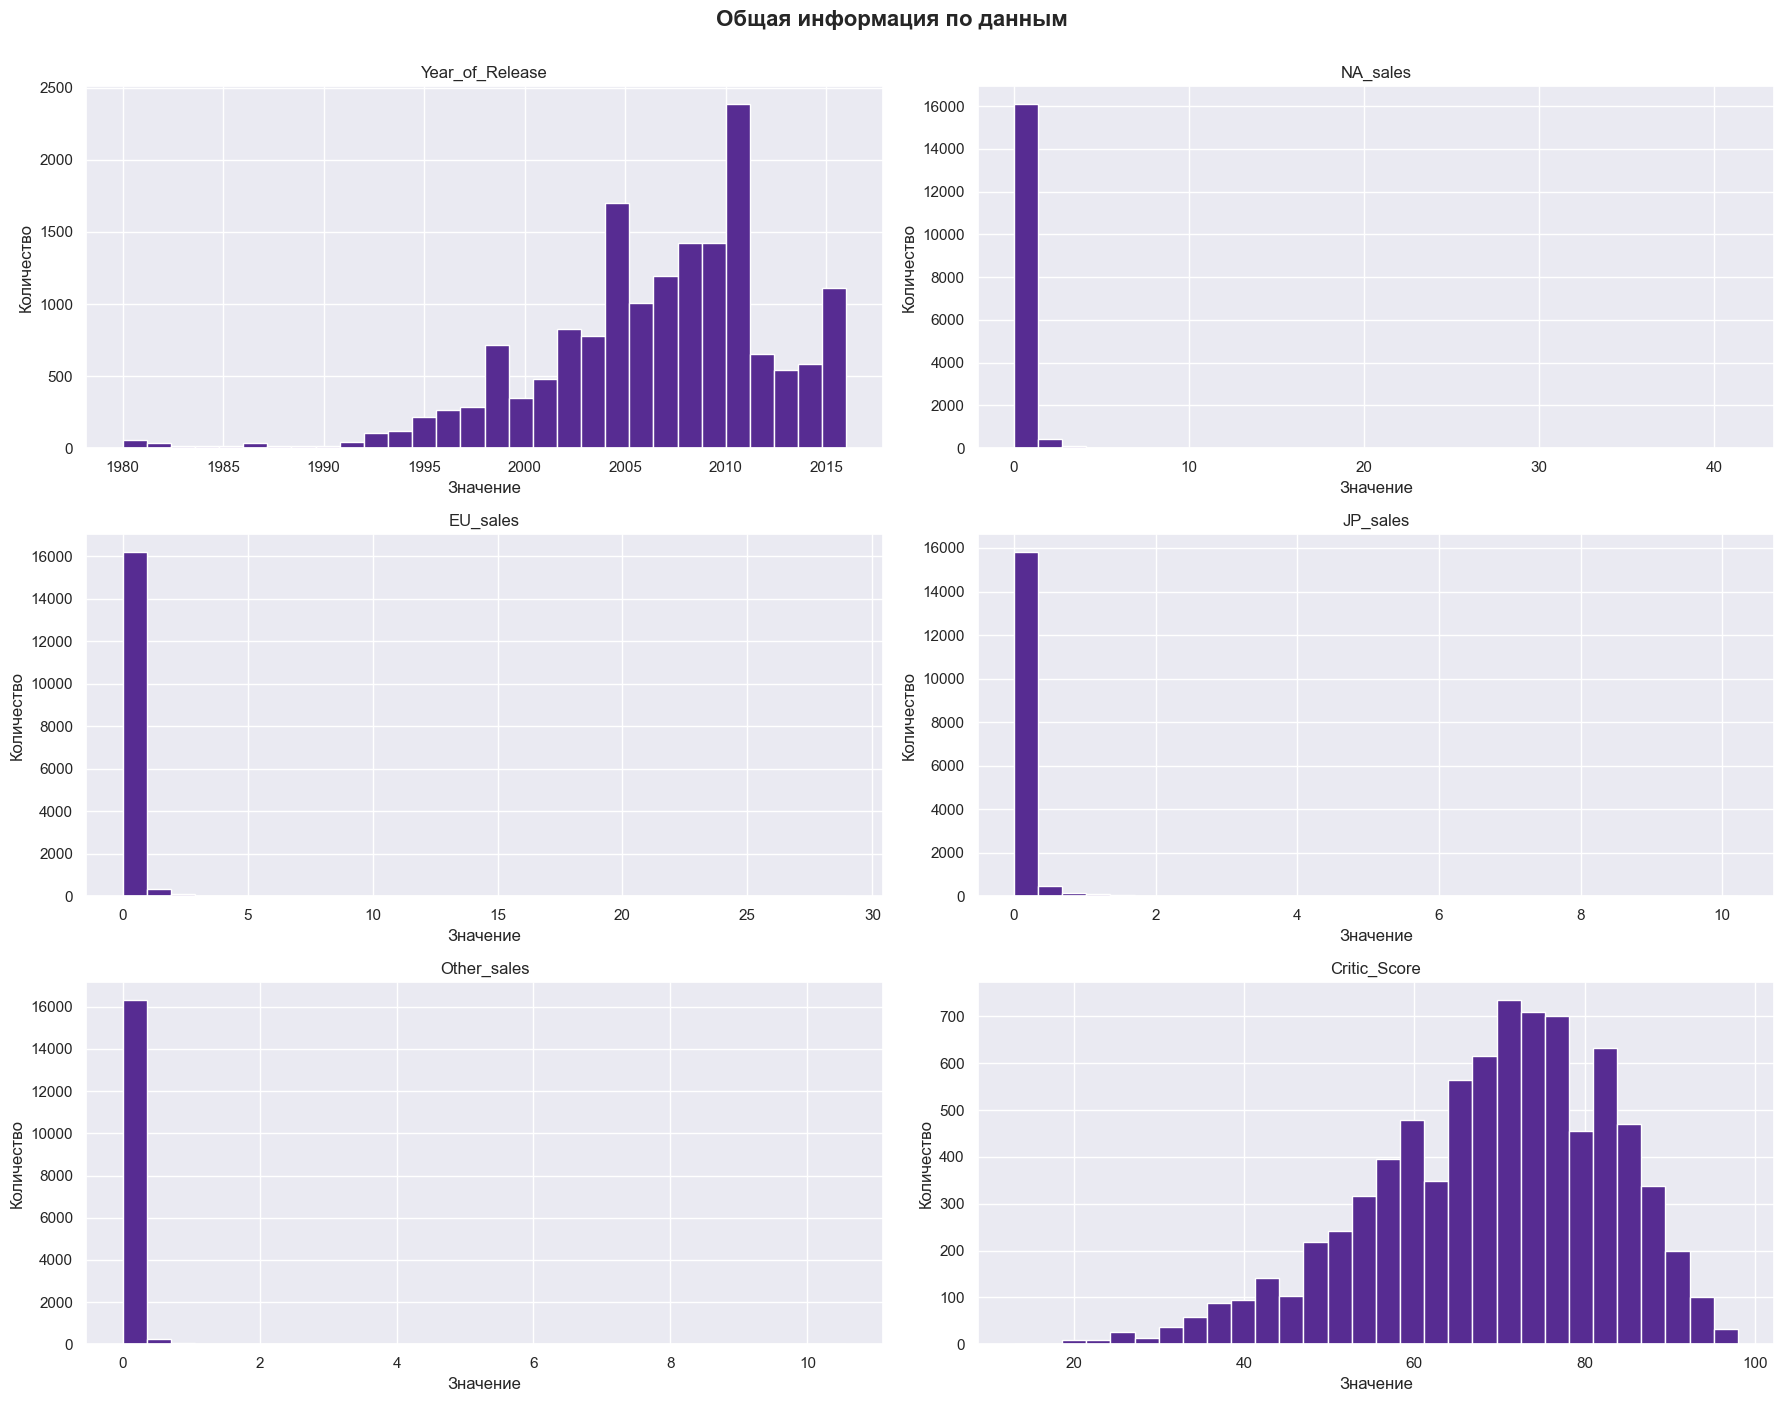

In [9]:
# Вывод общей сводки в гистограмах
ax = df.hist(bins=BINS, **FIGSIZE_GRID)
plt.suptitle('Общая информация по данным', **FIG_SUPTITLE_KWARGS)

for ax in ax.flatten():
    ax.set(**LABELS_NUM)

plt.tight_layout()
plt.show()

### Выводы
---
> - В общем виде данные можно назвать грязными
> - Всего строк - **`16714`**, всего столбцов - **`11`**
> - В 6 столбцах отсутствуют значения:
> |Стобец|Кол-во|
> |---|---|
> |Critic_Score|8578|
> |User_Score|6701|
> |Rating|6766|
> |Name|2|
> |Genre|2|
> |Year_of_Release|269|
> - Некорректные типы данных:
> |Столбец|Текущий Тип|Корректный Тип|
> |---|---|---|
> |Year_of_Release|float64|int|
> |User_Score|object|float64|
> - Явные дубликаты отсутствуют
> - Найденены явные дубликаты: **`2`**

## Предобработка данных
---

### Общая предобработка
---

In [10]:
# Создание копии для работы
df_cleaned = df.copy()

In [11]:
# Приведение названий столбцов к нижнему регистру
df_cleaned.columns = df_cleaned.columns.str.lower()

# Приведение названий значений к нижнему регистру и замена символов для читаемости
def clean_text(x):
    x = (
        x
        .str.lower()
        .replace(r'^[^a-z0-9]+', '', regex=True)
        .replace(r'[^a-z0-9]+$', '', regex=True)
        .replace('&', 'and', regex=True)
        .replace('à', 'a', regex=True)
        .replace([r'[ \-\/]'], '_', regex=True)
        .replace([r'[:\!\.]'], '', regex=True)
    )
    
    return x

cols = ['name', 'platform', 'genre', 'rating']

df_cleaned[cols] = df_cleaned[cols].apply(clean_text)

df_cleaned.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii_sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super_mario_bros,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario_kart_wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii_sports_resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon_red_pokemon_blue,gb,1996.0,role_playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
# Удаление строк без названий игр
df_cleaned = df_cleaned.query('~name.isna()').reset_index(drop=True)

df.shape, df_cleaned.shape

((16715, 11), (16713, 11))

In [13]:
# Удаление неявных дубликатов
df_cleaned = df_cleaned.drop_duplicates(
    subset=['name', 'year_of_release', 'platform'],
    keep='last'
)

df.shape, df_cleaned.shape

((16715, 11), (16712, 11))

In [14]:
# Обработка продаж
# Добавление столбца с общей суммой продаж по регионам
df_cleaned['total_sales'] = np.sum(df_cleaned[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']], axis=1)

df_cleaned.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii_sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e,82.54
1,super_mario_bros,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario_kart_wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii_sports_resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e,32.77
4,pokemon_red_pokemon_blue,gb,1996.0,role_playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [15]:
# Удаление данных с отсутствующими значениями
df_cleaned = df_cleaned.query('~year_of_release.isna()')

# Приведение значения года к типу int
df_cleaned.year_of_release = df_cleaned.year_of_release.astype(int)

# Проверка на наличие отсутсвующих значений

print(f"""
Отсутствующие значения в 'year_of_release':
- До:  {df.Year_of_Release.isna().sum()}
- После: {df_cleaned.year_of_release.isna().sum()}

Период данных: {df_cleaned.year_of_release.min()}-{df_cleaned.year_of_release.max()} ({df_cleaned.year_of_release.nunique()} лет)
""")


Отсутствующие значения в 'year_of_release':
- До:  269
- После: 0

Период данных: 1980-2016 (37 лет)



In [16]:
# Обработка пропусков в оценках критиков
df_cleaned.critic_score = (
    df_cleaned
    .sort_values('critic_score')
    .groupby('name')['critic_score']
    .transform(lambda x: x.fillna(x.min()))
    .fillna(-1)
    .astype(int)
)

print(f"""
Пропусков после обработки: {df_cleaned.critic_score.isna().sum()}
---

{df_cleaned.critic_score.describe()}
""")


Пропусков после обработки: 0
---

count    16443.000000
mean        36.761905
std         36.184560
min         -1.000000
25%         -1.000000
50%         47.000000
75%         72.000000
max         98.000000
Name: critic_score, dtype: float64



In [17]:
# Обработка значений оценки пользователей
# Приведение значений tbd (будет анонсировано позднее) к NaN
df_cleaned.user_score = pd.to_numeric(df_cleaned.user_score, errors='coerce')

# Заполнение пустых значений оценок минимальным по текущей группе игр при наличии
df_cleaned.user_score = (
    df_cleaned
    .sort_values('user_score')
    .groupby('name')['user_score']
    .transform(lambda x: x.fillna(x.min()))
    .fillna(-1)
    .astype(int)
)

print(f"""
Пропусков после обработки: {df_cleaned.user_score.isna().sum()}
---

{df_cleaned.user_score.describe()}
""")


Пропусков после обработки: 0
---

count    16443.000000
mean         2.940704
std          3.959265
min         -1.000000
25%         -1.000000
50%          3.000000
75%          7.000000
max          9.000000
Name: user_score, dtype: float64



In [18]:
# Обработка рейтингов игр
# Предварительная проверка значений
print(f"""
Данные ДО обработки
--
Типы рейтингов: {df_cleaned.rating.unique()}
Пропусков: {df_cleaned.rating.isna().sum()}
""")

# Заполнение отстутствующих значений минимальным имеющимся в группах игр по другим платформам
df_cleaned.rating = (
    df_cleaned
    .sort_values('rating')
    .groupby('name')['rating']
    .transform(lambda x: x.fillna('other'))
)

# Замена неактуального типа рейтинга К-А на Е
df_cleaned.loc[df_cleaned.rating == 'k_a', 'rating'] = 'e'

# Приведение данных рейтинга к типу category
df_cleaned.rating = df_cleaned.rating.astype('category')

# Проверка на пропуски
print(f"""
Данные ПОСЛЕ обработки
---

Пропусков: {df_cleaned.rating.isna().sum()}
Типы рейтингов:{df_cleaned.rating.unique()}
""")


Данные ДО обработки
--
Типы рейтингов: ['e' nan 'm' 't' 'e10' 'k_a' 'ao' 'ec' 'rp']
Пропусков: 6676


Данные ПОСЛЕ обработки
---

Пропусков: 0
Типы рейтингов:['e', 'other', 'm', 't', 'e10', 'ao', 'ec', 'rp']
Categories (8, object): ['ao', 'e', 'e10', 'ec', 'm', 'other', 'rp', 't']



In [19]:
# Финальная проверка данных
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16443 non-null  object  
 1   platform         16443 non-null  object  
 2   year_of_release  16443 non-null  int64   
 3   genre            16443 non-null  object  
 4   na_sales         16443 non-null  float64 
 5   eu_sales         16443 non-null  float64 
 6   jp_sales         16443 non-null  float64 
 7   other_sales      16443 non-null  float64 
 8   critic_score     16443 non-null  int64   
 9   user_score       16443 non-null  int64   
 10  rating           16443 non-null  category
 11  total_sales      16443 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(3)
memory usage: 1.5+ MB


### Выводы
---
> - Названия колонок и строковые значения (**`'name', 'platform', 'genre', 'rating'`**) были приведены к нижнему регистру и очищены от лишних символов
> - Были удалены строки:
>     - без названий игр (**`всего по 2`**)
>     - с неявными дубликатами (**`всего по 2`**)
>     - с отсутствием года релиза (**`всего - 269`**)
> - Пропуски в оценках критиков (**`всего 4765`**) заполнены ближайшими минимальными оценками по другим платформам, если имелись и заглушкой (**`-1`**) для удобства фильтрации
> > Пропуски в значениях могут быть связаны с отсутствием оценок в целом и потерей в процессе формирования данных
> - Пропуски в оценках критиков (**`всего 3656`**) заполнены ближайшими минимальными оценками по другим платформам, если имелись заглушкой (**`-1`**) для удобства фильтрации
> > Пропуски в значениях могут быть связаны с отсутствием оценок в целом и потерей в процессе формирования данных. При этом **оценки типа TBD**  означают, что они "подлежат определению", т.е. отсутствуют на текущий момент
> - Пропуски в типах рейтингов (**`всего 3679`**) были заполнены категорией Other. А категория К-А (устаревшая категория) была перенесена в категорию Е.
> > Пропуски в значениях могли быть связаны с отсутствием рейтинга, как такового,потерей в процессе формирования данных. Также отсутствие рейтинга может быть связано с тем, что система рейтингов расчитана на Североамериканский и Канадский рынки, а игры без рейтинга выпускались для иных рынков

## Исследовательский анализ данных
---

In [20]:
# Подготовка данных для анализа количества релизов игр по годам
df_release_count = (
    df_cleaned
    .drop_duplicates(subset=['name', 'year_of_release'])
    .pivot_table(
        index='year_of_release',
        values='name',
        aggfunc='count'
    )
    .reset_index()
    .rename(columns={'name': 'games_count'})
    .sort_values('games_count', ascending=False)
)

df_release_count.head()

,year_of_release,games_count
28,2008,1038
29,2009,1001
30,2010,900
27,2007,883
31,2011,779


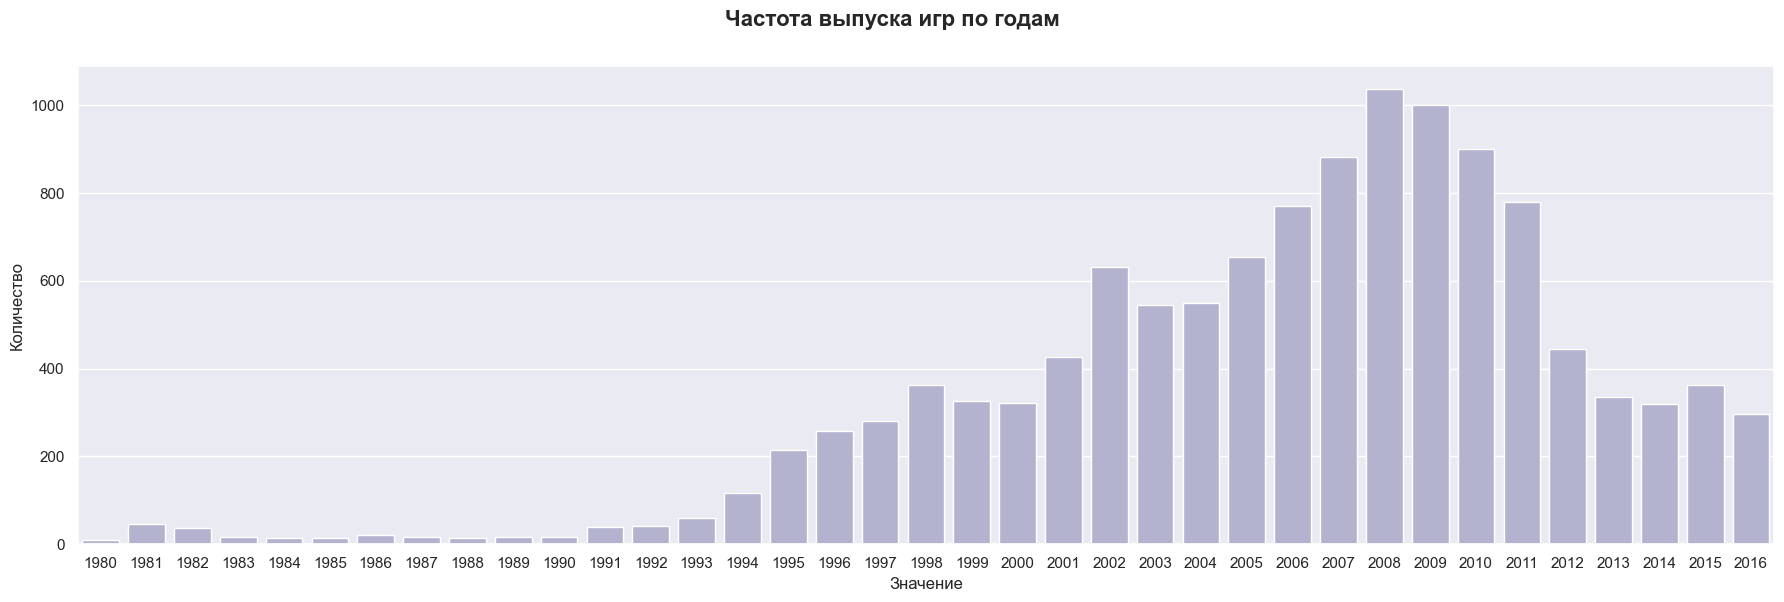

,year_of_release,games_count
count,37.000000,37.000000
mean,1998.000000,329.297297
std,10.824355,318.865773
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,297.000000
75%,2007.000000,545.000000
max,2016.000000,1038.000000


In [21]:
# Визуализация количества релизов по годам
fig, ax = plt.subplots(**FIGSIZE_SINGLE)

sns.barplot(
    data=df_release_count,
    x='year_of_release',
    y='games_count',
    color=COLOR_SINGLE_BASIC,
    ax=ax
)

ax.set(**LABELS_NUM)

fig.suptitle('Частота выпуска игр по годам', **FIG_SUPTITLE_KWARGS)

plt.tight_layout()
plt.show()

df_release_count.describe()

##### Промежуточные выводы
- Исходя из графика чатсоты выпуска игр можно сделать заключение о том, что **`наибольшее число игр было выпущено с 2001 г.`**
- Самым богатым на игры годом стал **`2008 - выпущено более 1000 игр`**

In [22]:
# Сумма продаж игр по платформам за разные годы
df_platform_sales = (
    df_cleaned
    .pivot_table(
        index=['year_of_release', 'platform'],
        values='total_sales',
        aggfunc='sum'
    )
    .rename(columns={'total_sales': 'total_sales_sum'})
    .reset_index()
)

df_platform_sales.head()

,year_of_release,platform,total_sales_sum
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,nes,10.96


In [23]:
# Отбор топ платформ (продажи ≥ 150 млн копий)
df_pop_platforms = (
    df_platform_sales
    .pivot_table(
        index='platform',
        values='total_sales_sum',
        aggfunc='sum'
    )
    .query('total_sales_sum >= 150')
    .sort_values('total_sales_sum', ascending=False)
    .reset_index()
)

df_pop_platforms

,platform,total_sales_sum
0,ps2,1233.56
1,x360,961.24
2,ps3,928.78
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


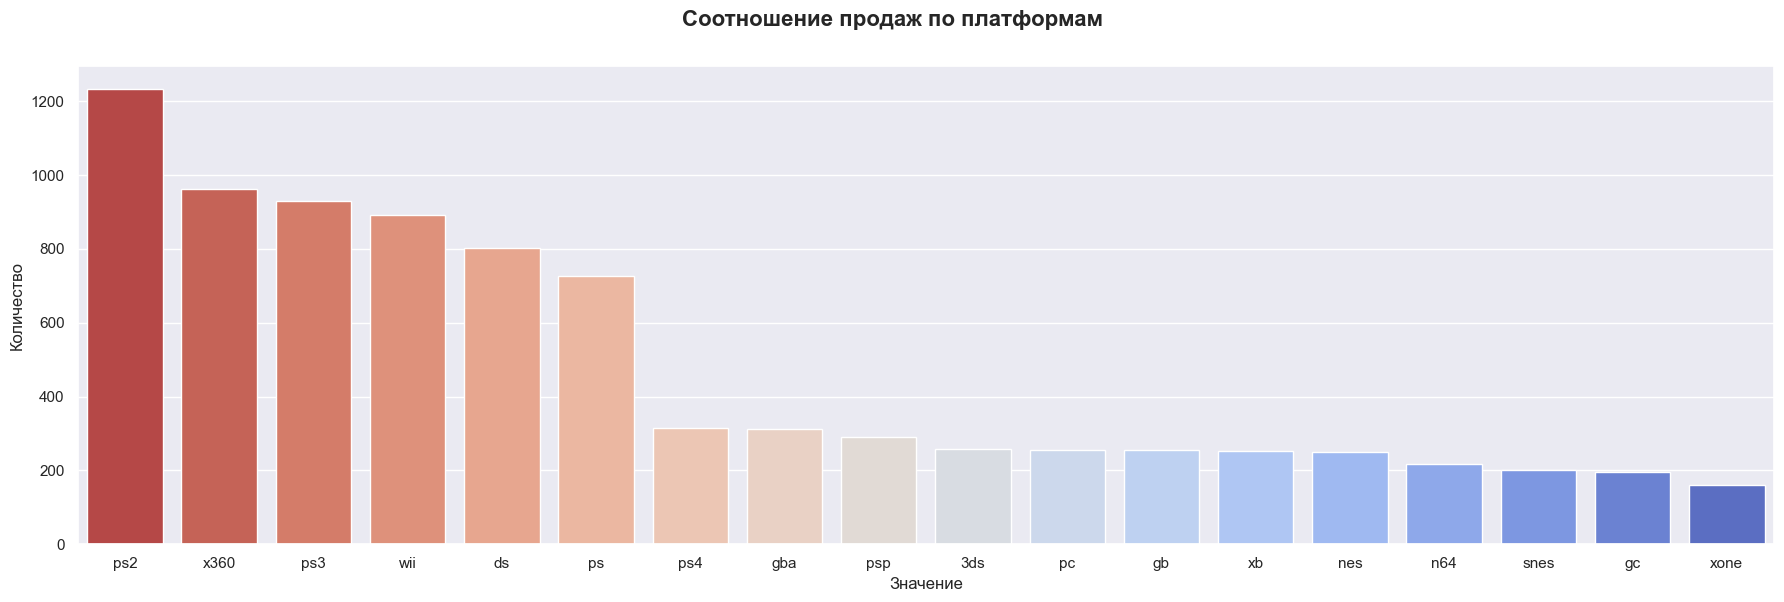

,total_sales_sum
count,18.000000
mean,472.577222
std,343.969190
min,159.320000
25%,251.180000
50%,273.670000
75%,783.980000
max,1233.560000


In [24]:
# Визуализация популярных платформ
fig, ax = plt.subplots(**FIGSIZE_SINGLE)

sns.barplot(
    data=df_pop_platforms,
    x='platform',
    y='total_sales_sum',
    palette=PALETTE_CAT,
    ax=ax
)

ax.set(**LABELS_NUM)

fig.suptitle('Соотношение продаж по платформам', **FIG_SUPTITLE_KWARGS)

plt.tight_layout()
plt.show()

df_pop_platforms.describe()

In [25]:
# Формирование датафрейма популярных платформ по годам
popular_platforms = df_pop_platforms.platform.values

df_pop_by_years = df_platform_sales.query('platform.isin(@popular_platforms)')

df_pop_by_years.head()

,year_of_release,platform,total_sales_sum
4,1983,nes,10.96
6,1984,nes,50.08
8,1985,ds,0.02
9,1985,nes,53.44
10,1985,pc,0.04


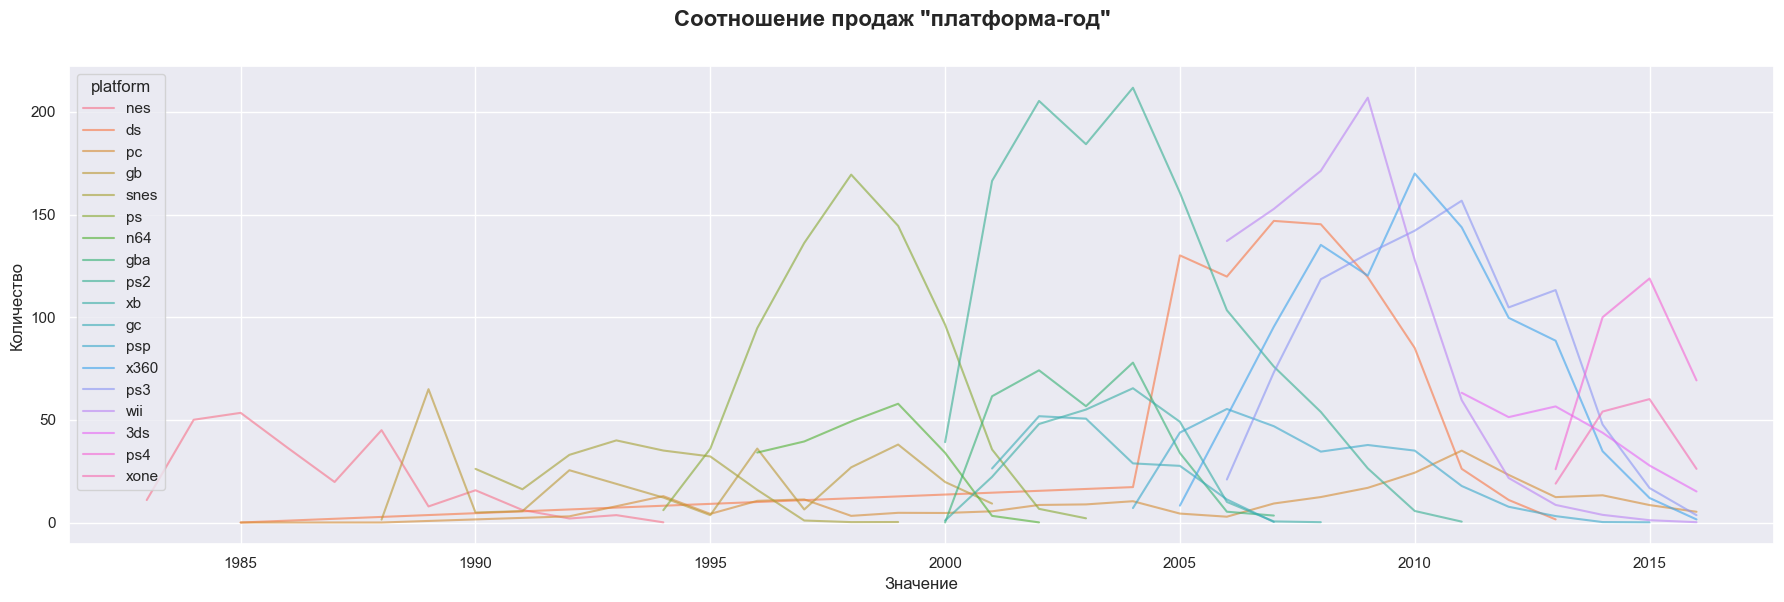

In [26]:
# Визуализация данных
fig, ax = plt.subplots(**FIGSIZE_SINGLE)

sns.lineplot(
    data=df_pop_by_years,
    x='year_of_release',
    y='total_sales_sum',
    hue='platform',
    alpha=ALPHA_FILL,
    ax=ax
)
    
ax.set(**LABELS_NUM)

fig.suptitle('Соотношение продаж "платформа-год"', **FIG_SUPTITLE_KWARGS)

plt.tight_layout()
plt.show()

In [27]:
# Проверка жизненного цикла платформ
time_life = df_cleaned.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1
time_life_10y = time_life[time_life.life < 10]

print(f'''Жизненный цикл платформ (лет)

По всем платформ: {time_life.life.median() }
Платформы младше 10 лет: {time_life_10y.life.median()}
''')

Жизненный цикл платформ (лет)

По всем платформ: 7.0
Платформы младше 10 лет: 4.5



##### Промежуточные выводы
- Исходя из графика общих продаж по годам можно выделить самые высокие по продажам платформы **`ps | ds | wii | ps3 | x360 | ps2 от 700+ ед за все время`**
- По соотношению продаж "платформа-год" можно отметить, что **`новые платформы появляются каждые 5-7 лет`**, а старые платформы, а **`cрок жизни старых платформ составляет 7 лет`**
- Стоит так же отметить, у большинства платформ были приостановлены продажи. Возможно это связано с прекращением их поддержки и выпуска новых игр

In [28]:
# Определение актуального периода для анализа
# Подготовка датафрейма
df_actual = (
    df_cleaned
    .query('year_of_release > 2013')
    .reset_index(drop=True)
)

print(f'''
Выбранный период: {
df_actual.year_of_release.min()}-{df_actual.year_of_release.max()} гг.
''')

df_actual.head()


Выбранный период: 2014-2016 гг.



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call_of_duty_black_ops_3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1,other,14.63
1,grand_theft_auto_v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8,m,12.62
2,pokemon_omega_ruby_pokemon_alpha_sapphire,3ds,2014,role_playing,4.35,3.49,3.10,0.74,-1,-1,other,11.68
3,fifa_16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4,e,8.58
4,star_wars_battlefront_(2015,ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1,other,7.98


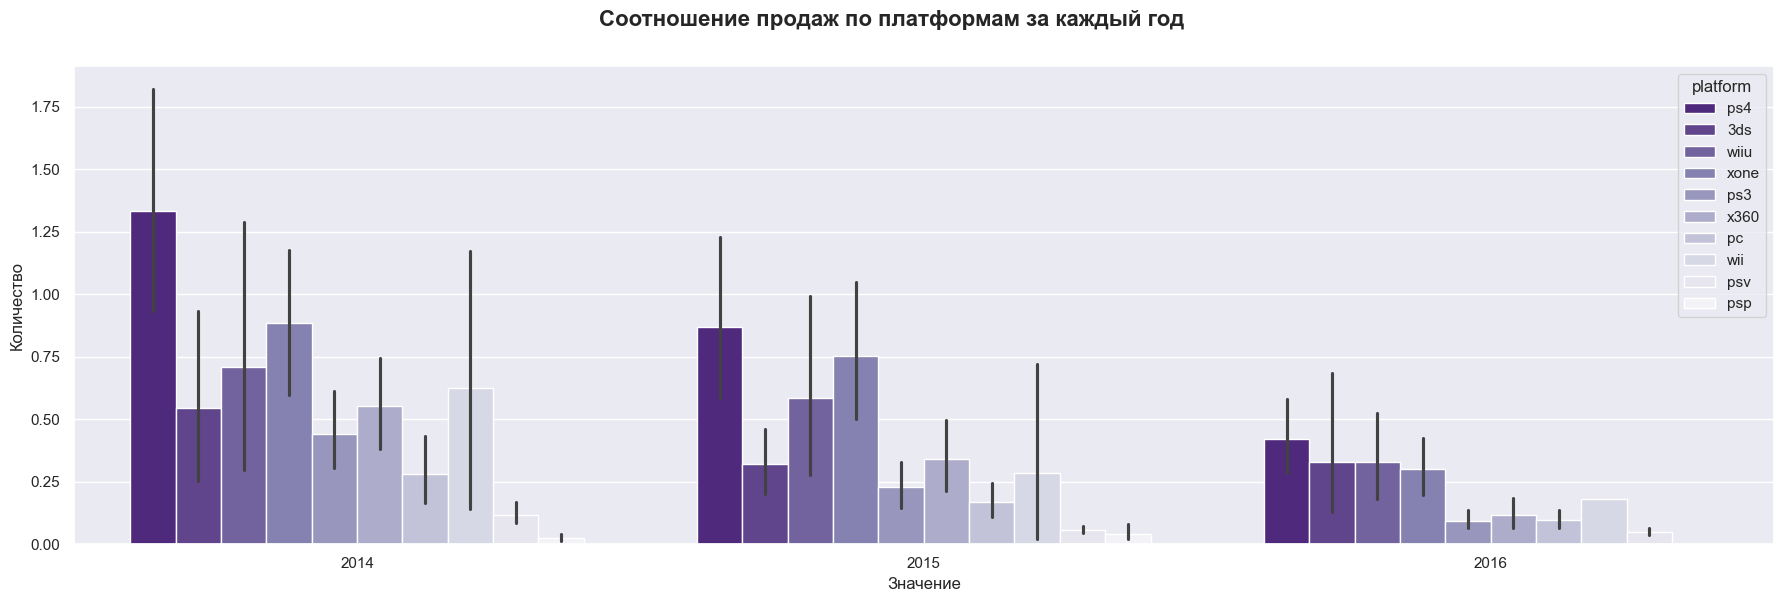

In [29]:
# Визуализация данных
fig, ax = plt.subplots(**FIGSIZE_SINGLE)

sns.barplot(
    data=df_actual,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    palette=PALETTE_NUMERIC_ALT,
    ax=ax
)

ax.set(**LABELS_CAT)

fig.suptitle(
    'Соотношение продаж по платформам за каждый год',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

##### Промежуточные выводы
- **Исключены данные до 2013 года**, т.к. срок в 3 года является наиболее оптимальным для анализа данных и построения трендов
- В результате обработки были отобраны следующие платформы: **`'ps4' 3ds' 'xone' 'wiiu' 'ps3' 'x360' 'pc' 'wii' 'psv' 'psp'`**,

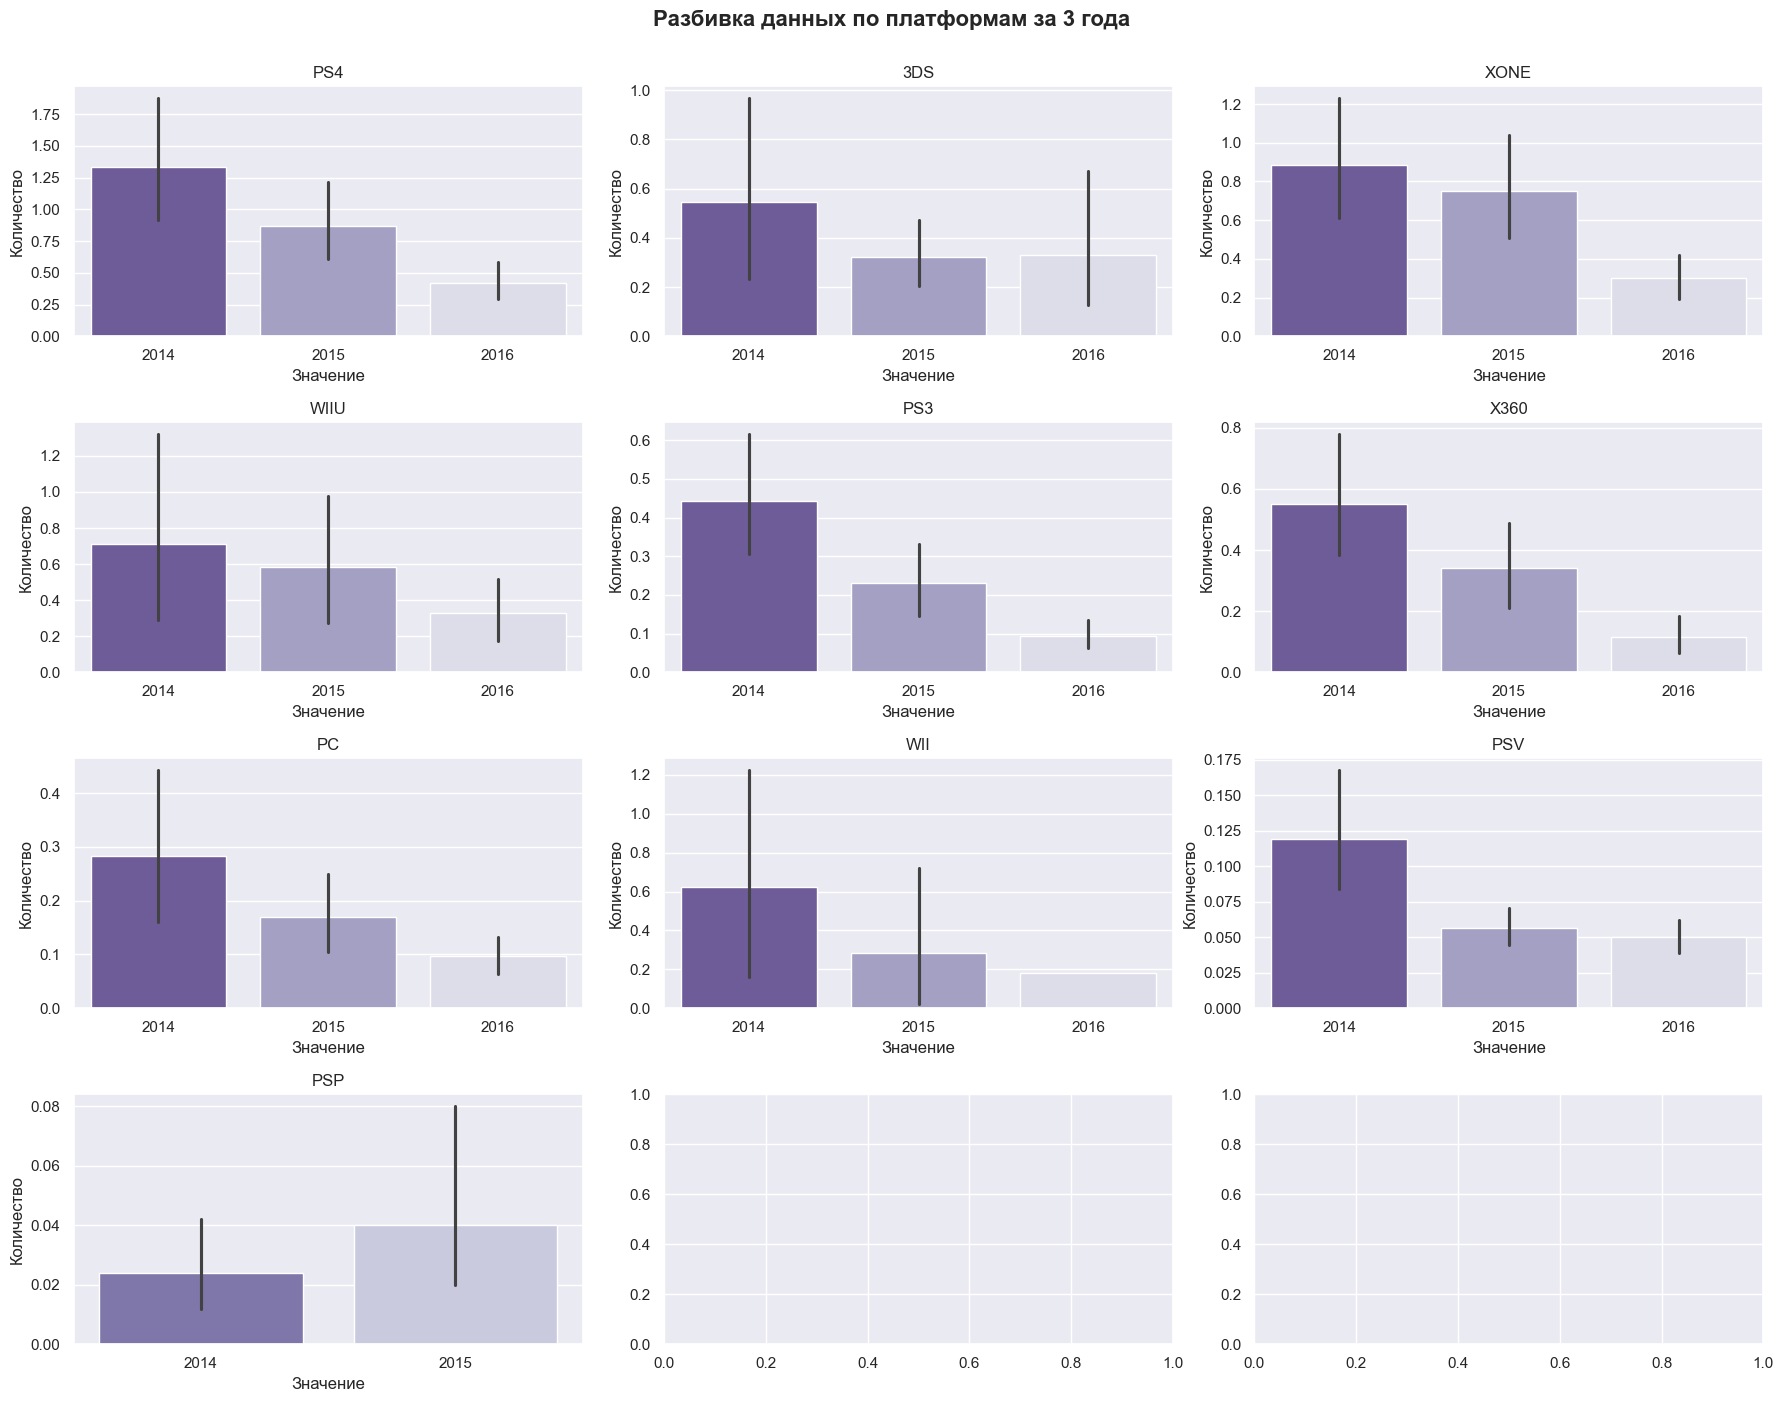

In [30]:
# Анализ потенциально прибыльных платформ
fig, axes = plt.subplots(
    nrows=4,
    ncols=3,
    **FIGSIZE_GRID,
)

for plat, ax in zip(df_actual.platform.unique(), axes.flat):    
    platform_data = df_actual.query('platform == @plat')

    sns.barplot(
        data=platform_data,
        x='year_of_release',
        y='total_sales',
        palette=PALETTE_NUMERIC_ALT,
        ax=ax
    )
    
    ax.set(
        title=plat.upper(),
        **LABELS_NUM
    )
    
fig.suptitle(
    'Разбивка данных по платформам за 3 года',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

In [31]:
# Расчет доли продаж по платформам
actual_platform_sales = (
    df_actual
    .pivot_table(
        index='platform',
        values='total_sales',
        aggfunc=np.median
    )
    .sort_values('total_sales',ascending=False)
    .reset_index()
)

actual_platform_sales['sales_share'] = (
    np
    .round(
        (actual_platform_sales.total_sales / np.sum(actual_platform_sales.total_sales)) * 100,
        decimals=1
    )
)

actual_platform_sales

,platform,total_sales,sales_share
0,xone,0.205,16.3
1,wiiu,0.190,15.1
2,ps4,0.185,14.7
3,wii,0.180,14.3
4,x360,0.180,14.3
5,ps3,0.110,8.7
6,3ds,0.090,7.1
7,pc,0.060,4.8
8,psv,0.040,3.2
9,psp,0.020,1.6


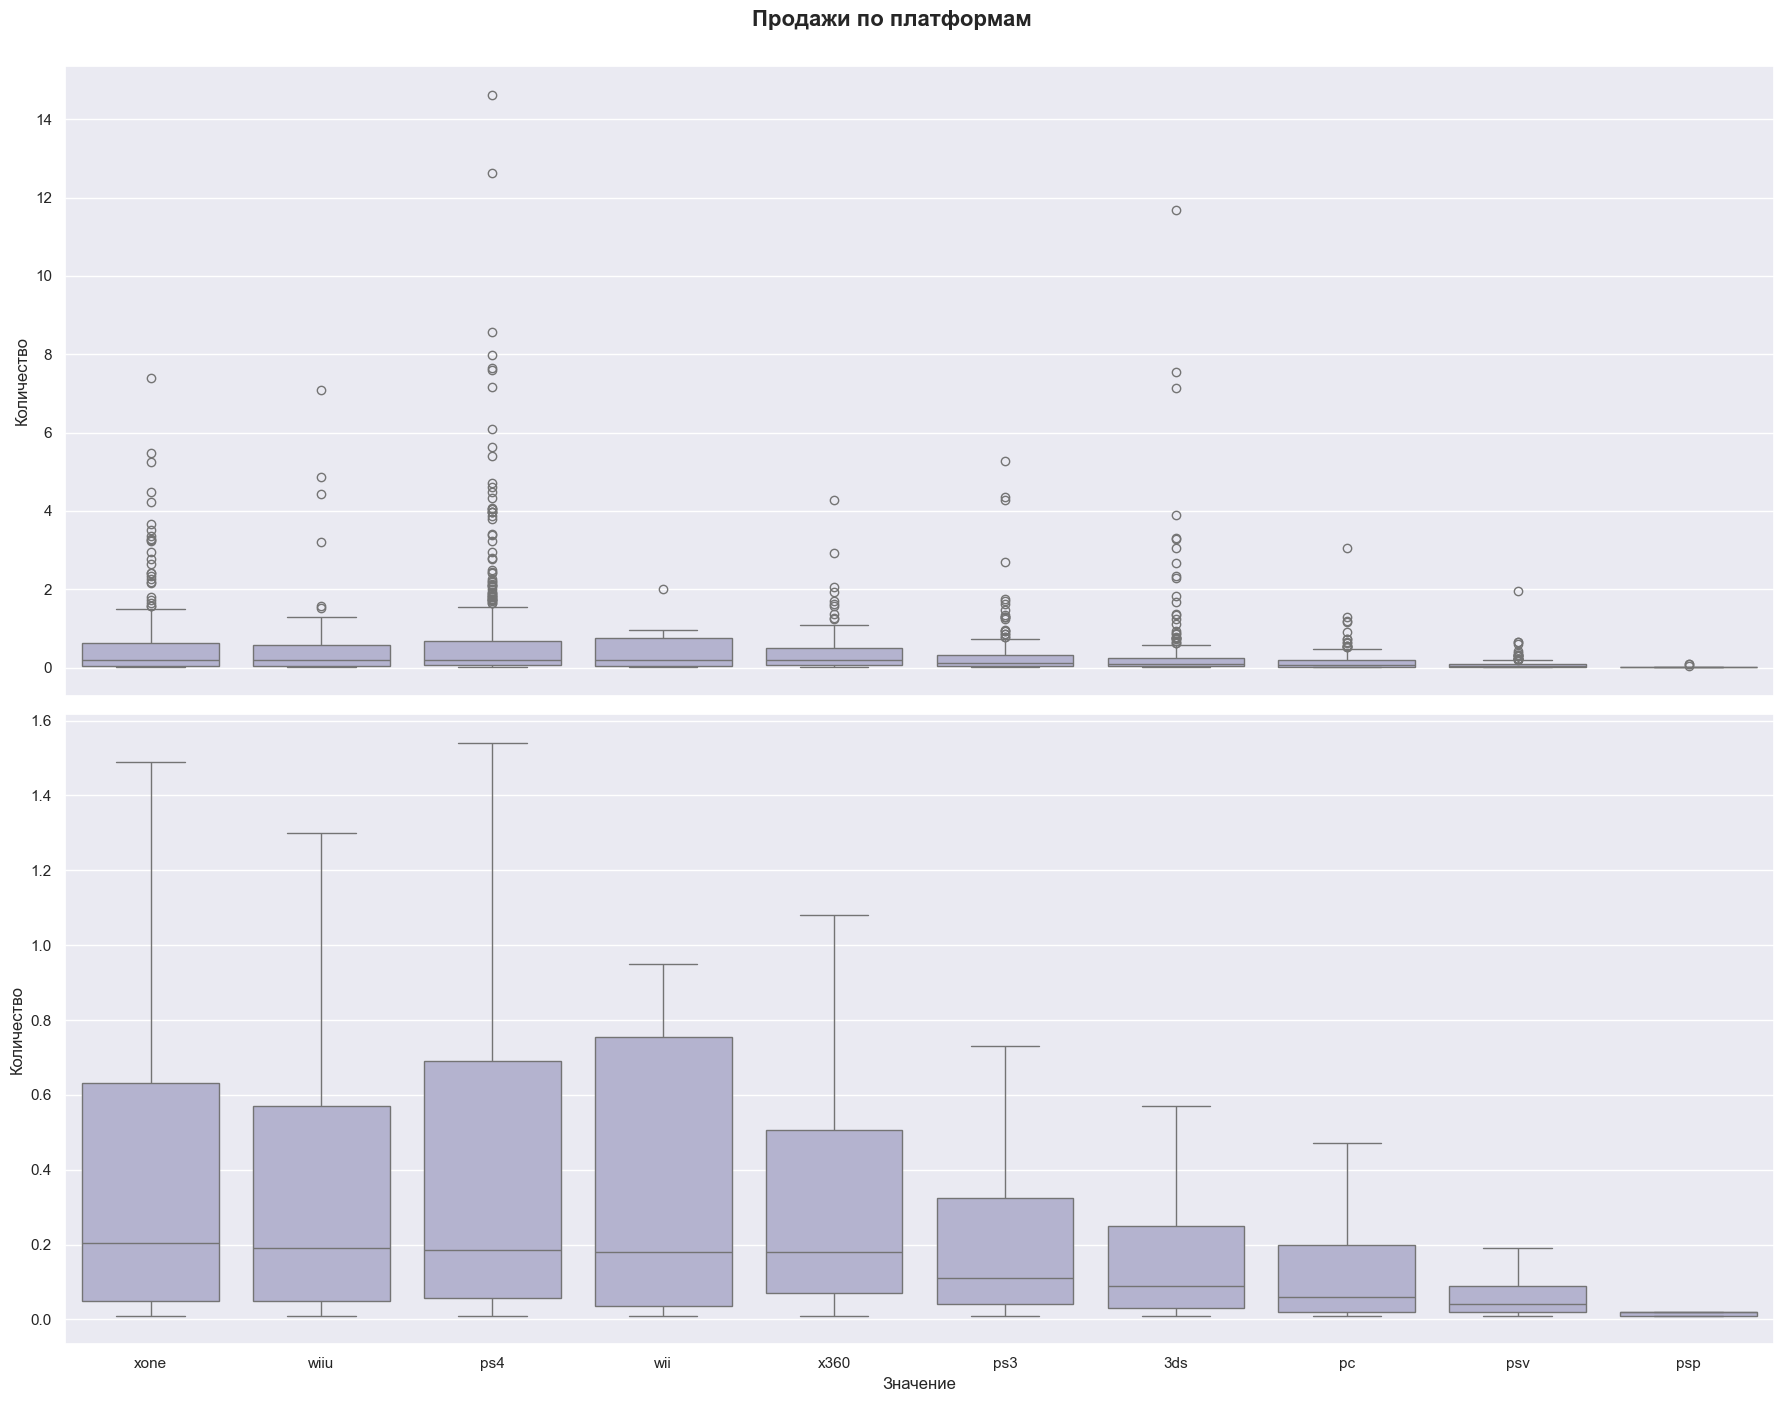

In [32]:
# Визуализация для анализа
fig, (ax_1, ax_2) = plt.subplots(
    nrows=2,
    sharex=True,
    **FIGSIZE_GRID,
)

sns.boxplot(
    data=df_actual,
    x='platform',
    y='total_sales',
    color=COLOR_SINGLE_BASIC,
    order=actual_platform_sales.platform.unique(),
    ax=ax_1
)

ax_1.set(**LABELS_NUM)

sns.boxplot(
    data=df_actual,
    showfliers=False,
    x='platform',
    y='total_sales',
    color=COLOR_SINGLE_BASIC,
    order=actual_platform_sales.platform.unique(),
    ax=ax_2
)

ax_2.set(**LABELS_NUM)

fig.suptitle(
    'Продажи по платформам',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

##### Промежуточные выводы
- Исходя из анализа платформ можно сделать вывод, что **`XONE (16.3%), PS4 (14.7%), WiiU (15.1%), X360 (14.3%), Wii (14.3%)` потенциально прибыльными платформами и занимают самую высокую долю рынка**, т.к. некоторые платформы еще не устарели, а новые только начинают разогревать рынок
- Также стоит отметить, что **`PC` является довольно стабильной платформой** несмотря на периоды роста и падения
- Остальные платформы находятся на стадии спада и прекращения обслуживания

In [33]:
# Соотношение продаж и оценок критиков и пользователей
# Разбивка данных по оценкам
actual_critic_scores = (
    df_actual[
        ['name',
         'platform',
         'critic_score',
         'total_sales']
    ]
    .query('critic_score >= 0')
)

actual_user_scores = (
    df_actual[
        ['name',
         'platform',
         'user_score',
         'total_sales']
    ]
    .query('user_score >= 0')
)

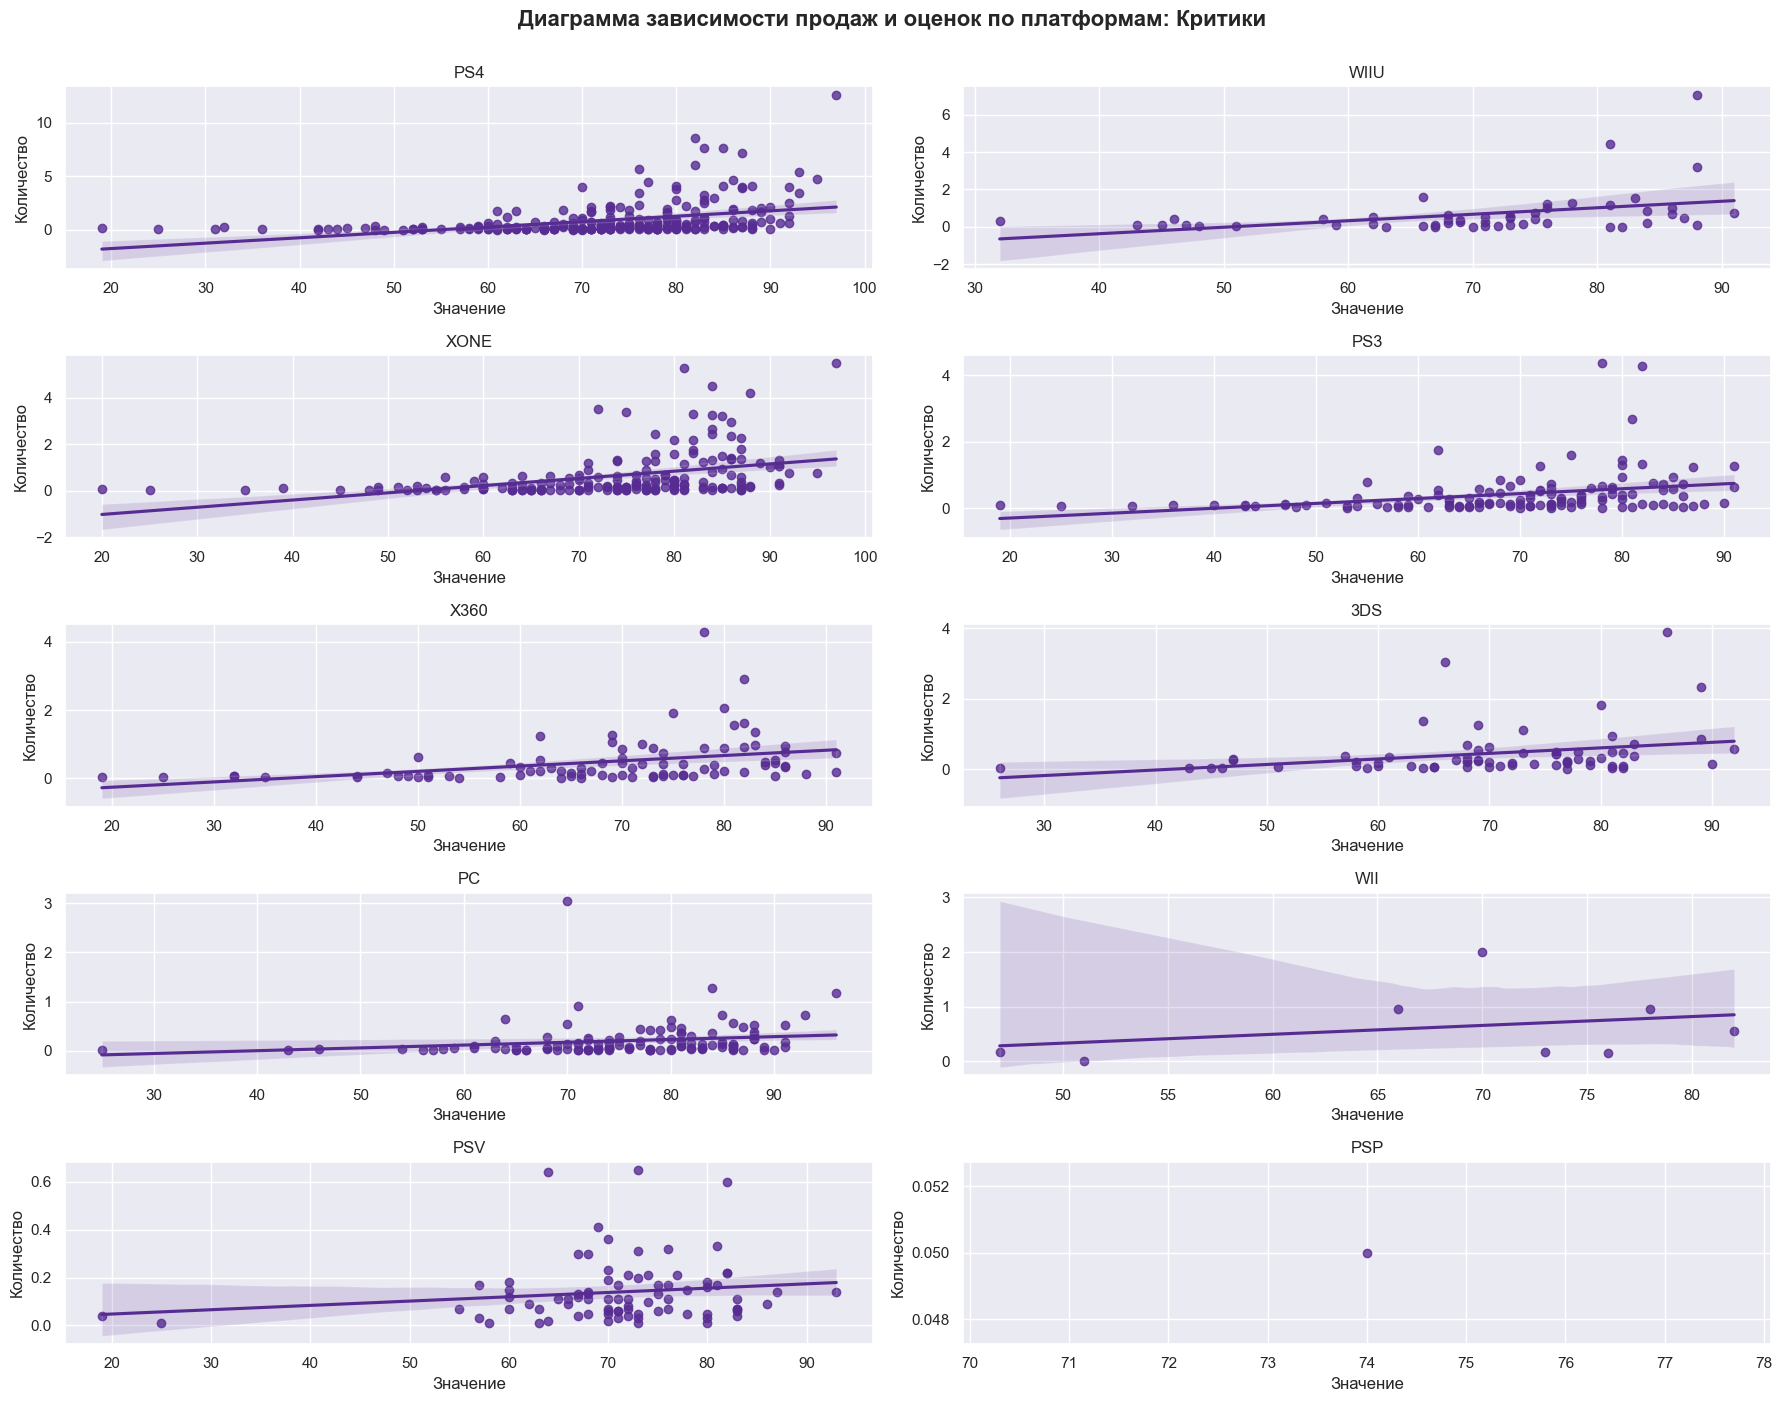

In [34]:
# Визуализация данных по оценке критиков
fig, axes = plt.subplots(
    nrows=5,
    ncols=2,
    **FIGSIZE_GRID
)

for plat, ax in zip(actual_critic_scores.platform.unique(), axes.flatten()):
    data_plat = actual_critic_scores.query('platform == @plat')
    
    sns.regplot(
        data=data_plat,
        x='critic_score',
        y='total_sales',
        ax=ax
    )
    
    ax.set(
        title=f'{plat.upper()}',
        **LABELS_NUM
    )
        
fig.suptitle(
    'Диаграмма зависимости продаж и оценок по платформам: Критики',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

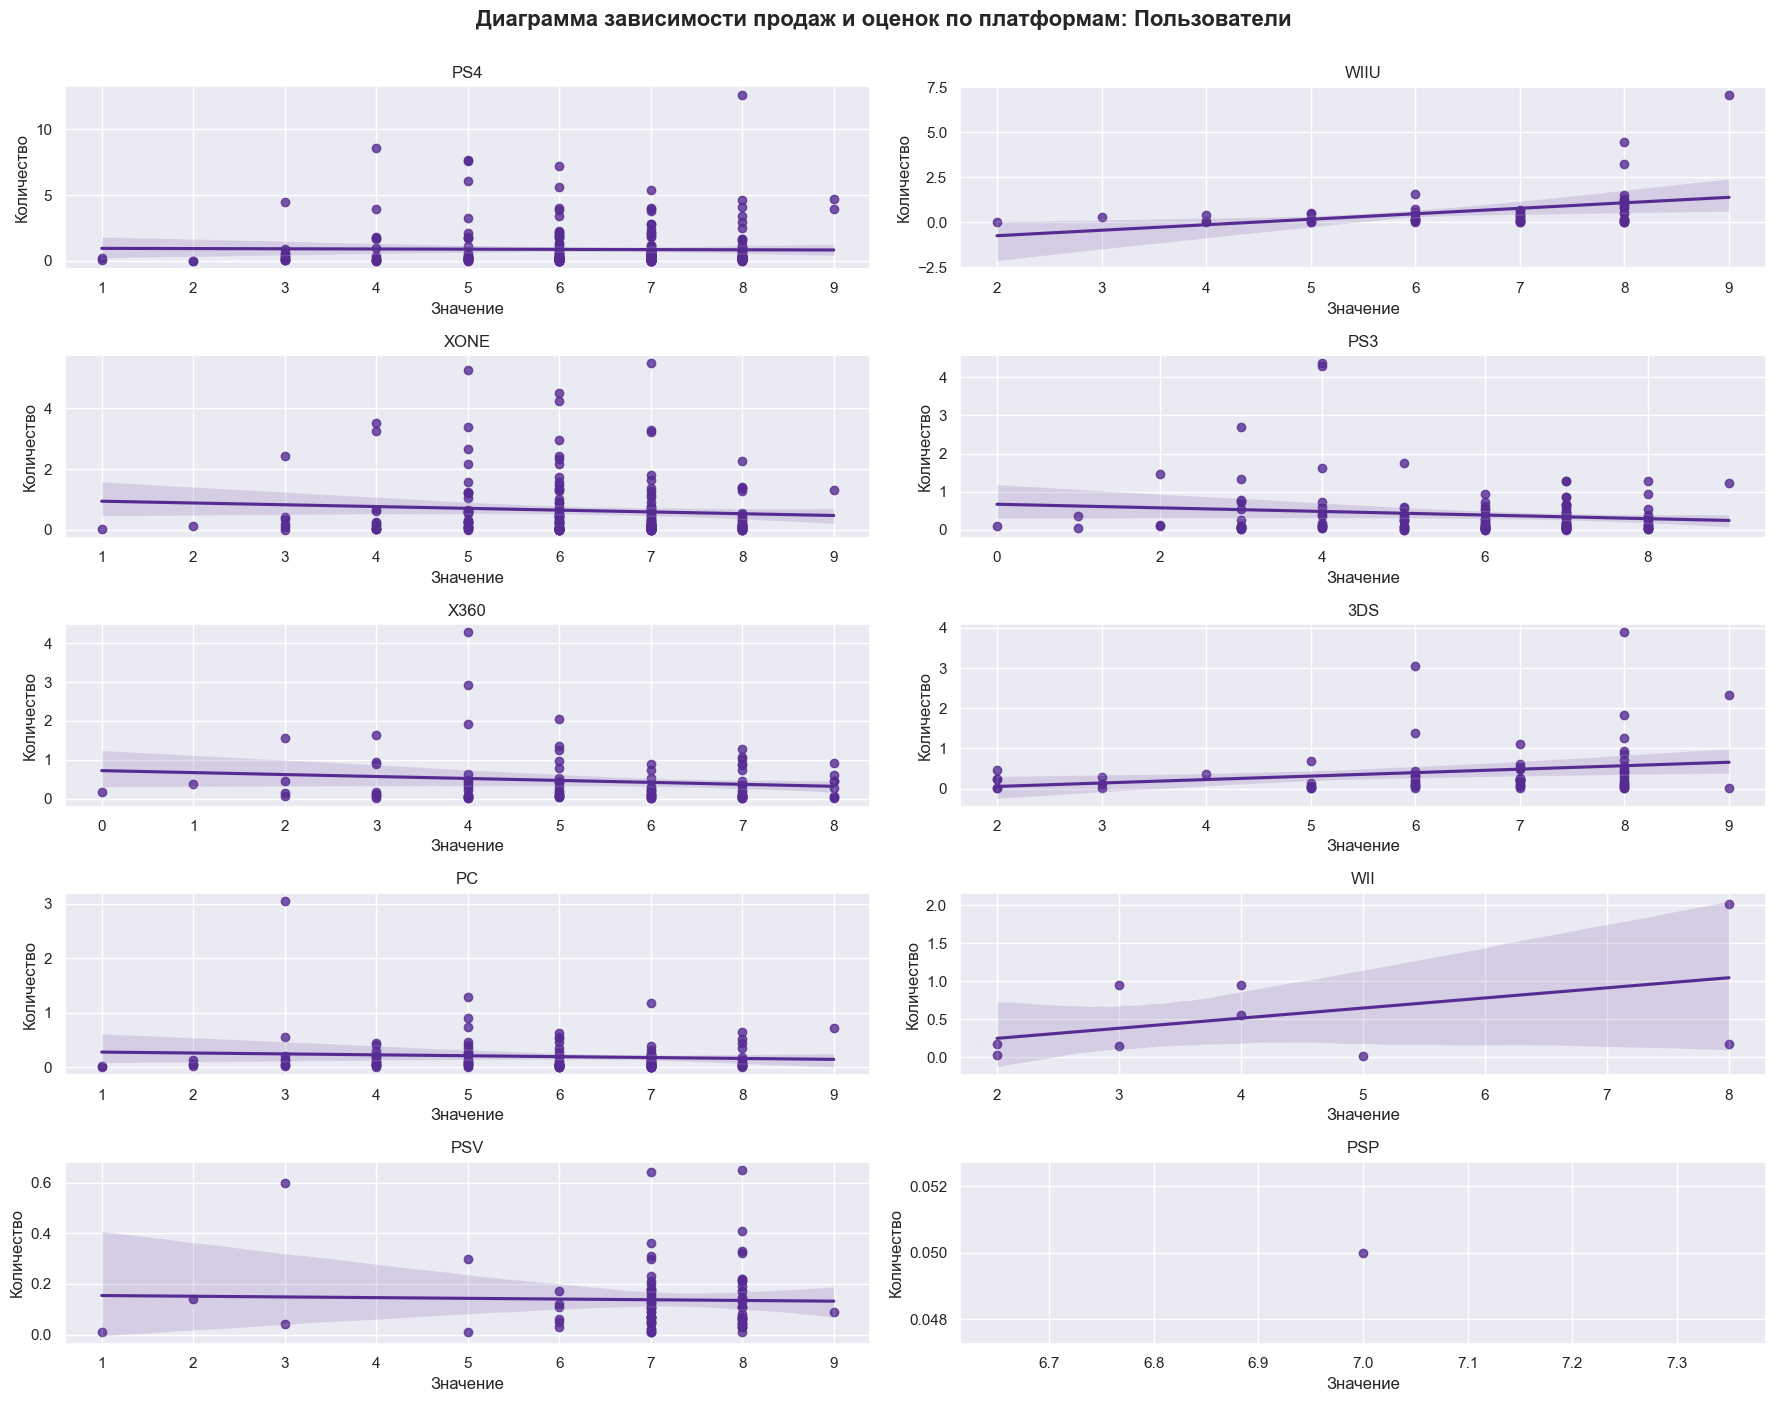

In [35]:
# Визуализация данных по оценке пользователей
fig, axes = plt.subplots(
    nrows=5,
    ncols=2,
    **FIGSIZE_GRID
)

for plat, ax in zip(actual_user_scores.platform.unique(), axes.flatten()):
    data_plat = actual_user_scores.query('platform == @plat')
    
    sns.regplot(
        data=data_plat,
        x='user_score',
        y='total_sales',
        ax=ax
    )
    
    ax.set(
        title=f'{plat.upper()}',
        **LABELS_NUM
    )
    
fig.suptitle(
    'Диаграмма зависимости продаж и оценок по платформам: Пользователи',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

In [36]:
# Подготовка данных для визуализации матриц корреляции
critic_corr_matrix = (
    actual_critic_scores
    .groupby('platform')
    .apply(lambda x: x['critic_score'].corr(x['total_sales']))
    .to_frame(name='critic_score')
)

user_corr_matrix = (
    actual_user_scores
    .groupby('platform')
    .apply(lambda x: x['user_score'].corr(x['total_sales']))
    .to_frame(name='user_score')
)

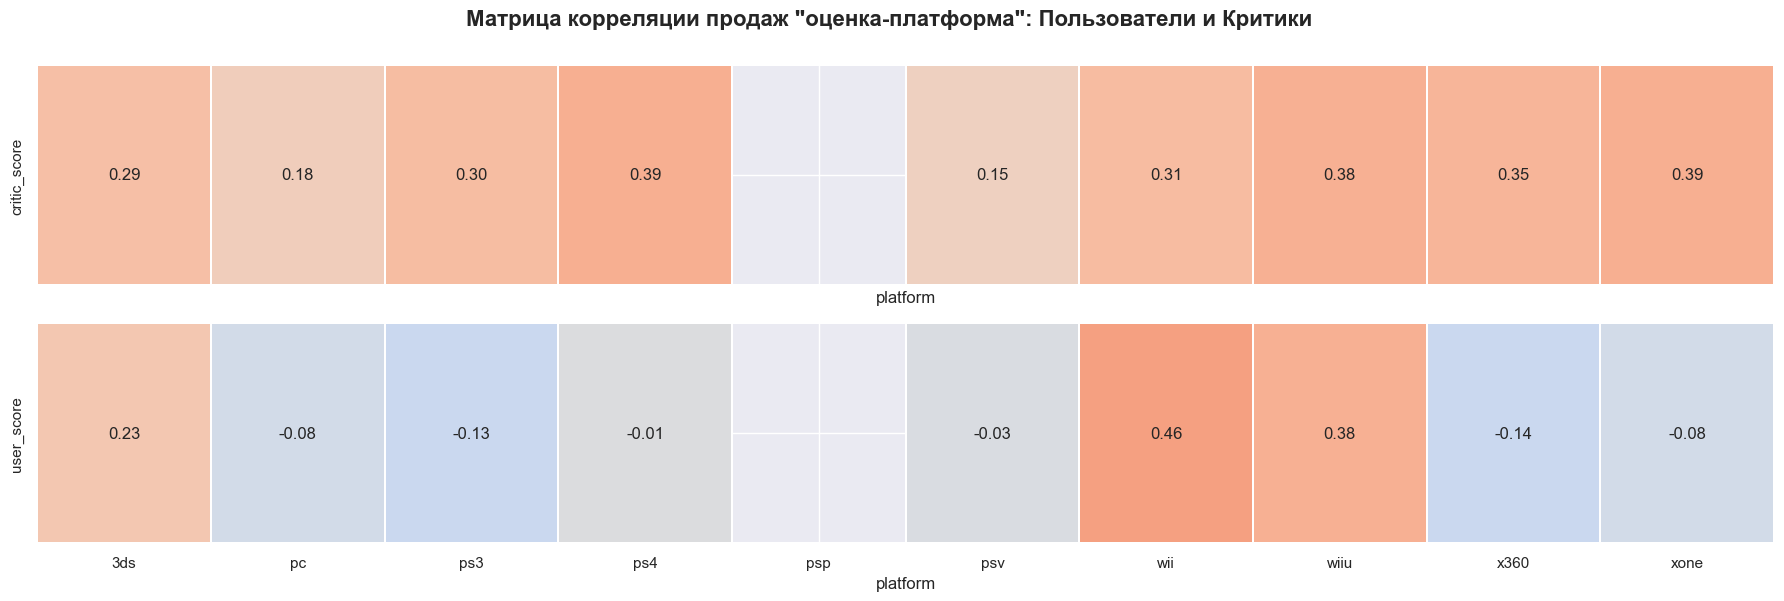

In [37]:
# Построение матрицы корреляции по оценкам критиков и пользователей
fig, axes = plt.subplots(
    nrows=2,
    sharex=True,
    **FIGSIZE_SINGLE
)

for (ax, df) in zip(axes.flatten(), (critic_corr_matrix.T, user_corr_matrix.T)):
    sns.heatmap(
        df,
        cmap=PALETTE_CAT_ALT,
        annot=True,
        vmin=-1,
        vmax=1,
        fmt='.2f',
        cbar=False,
        linewidths=0.2,
        ax=ax
    )

fig.suptitle(
    'Матрица корреляции продаж "оценка-платформа": Пользователи и Критики ',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

##### Промежуточные выводы
- **Наибольшая положительная корреляция между оценками критиков и платформами** наблюдается у всех платформ, но самая наибольшая у платформ **`PS4(0.7) и XONE(0.6)`**
> Вероятно, это связано с тем, что данные платформы являются довольно свежими и все игровые новинки прежде всего выходят именно на них

- **Наибольшая положительная корреляция между оценками пользователей и платформами** наблюдается у двух платформ **`WiiU и Wii (0.5 каждая)`**, в целом пользовательские оценки стоит рассмотреть на предмет практической значимости, т.к. они глобально вряд ли оказывают сильное влияние на продажи
> Такое различие в пользовательских оценках может быть связано со "вкусовщиной" или с большей ориентацией на мнение именно критиков и недоверием к отзывам обычных пользователей 

- Также можно сказать, что оценки критиков влияют на продажи игр больше, нежели пользовательские
- На платформу PSP оценки отсутствуют в принципе, ее можно признать окончательно устаревшей и неактуальной, т.к. производство и поддержка были преращены еще в 2014 году

In [38]:
# Подготовка данных для анализа жанров
actual_genre_sales = df_actual.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='median'
)

# Расчёт доли продаж (%)
actual_genre_sales['sales_share'] = (
    (actual_genre_sales['total_sales'] / actual_genre_sales['total_sales'].sum() * 100)
    .round(1)
)

actual_genre_sales = actual_genre_sales.sort_values('total_sales', ascending=False).reset_index()

actual_genre_sales

,genre,total_sales,sales_share
0,shooter,0.515,32.7
1,sports,0.180,11.4
2,platform,0.140,8.9
3,fighting,0.125,7.9
4,role_playing,0.110,7.0
5,simulation,0.100,6.3
6,action,0.090,5.7
7,misc,0.090,5.7
8,racing,0.090,5.7
9,strategy,0.060,3.8


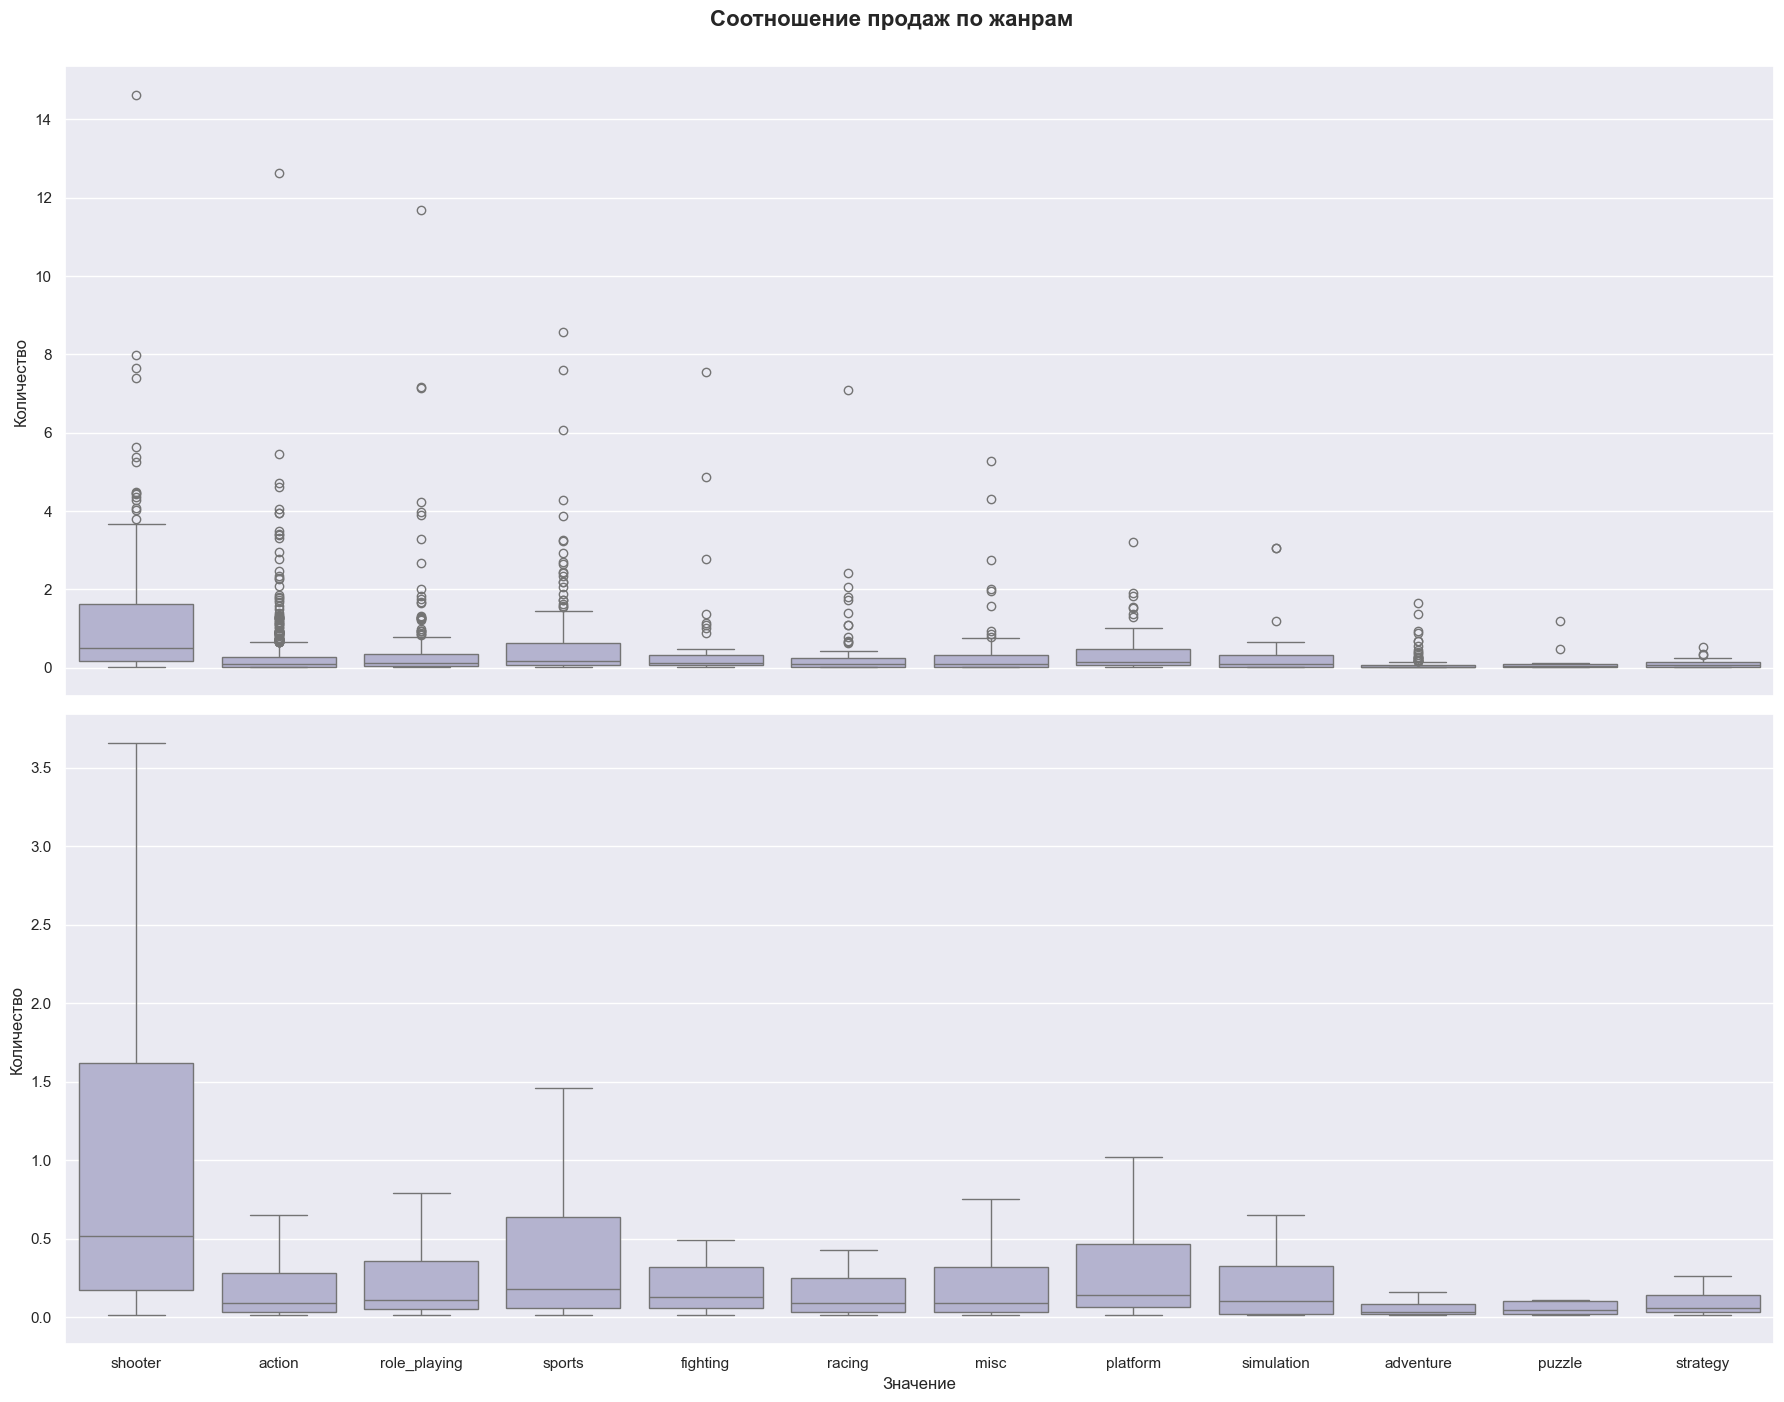

In [39]:
# Визуализация данных
fig, (ax_1, ax_2) = plt.subplots(
    nrows=2,
    sharex=True,
    **FIGSIZE_GRID,
)

sns.boxplot(
    data=df_actual,
    x='genre',
    y='total_sales',
    color=COLOR_SINGLE_BASIC,
    ax=ax_1
)

ax_1.set(**LABELS_NUM)

sns.boxplot(
    data=df_actual,
    showfliers=False,
    x='genre',
    y='total_sales',
    color=COLOR_SINGLE_BASIC,
    ax=ax_2
)

ax_2.set(**LABELS_NUM)

fig.suptitle(
    'Cоотношение продаж по жанрам',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

##### Промежуточные выводы
- Согласно данным анализа жанров можно отметить, что **`жанр Shooter занимает самую высокую долю продаж - 32.7%`**
- Далее идут такие жанры как **`Sports - 11.4%, Platform - 8.9%, Fighting - 7.9%, RP - 7%`**
- Жанрами с самой низкой долей продаж оказались - **`Strategy - 3.8%, Puzzle - 2.9%, Adventure - 1.9%`**

### Выводы
---
> - Наибольшее число игр выпускалось с 2001 года, пик пришёлся на 2008 год (более 1000 игр)
> - Лидирующие по продажам платформы за весь период — **`PS, DS, Wii, PS3, X360, PS2`**
> - Жизненный цикл всех платформ составляет примерно **7 ле**т, новые платформы появляются **каждые 5–7 лет**
> - Большинство старых платформ прекратили поддержку и выпуск новых игр, что отражается на снижении продаж
> - Взяты данные за последние 3 года для корректного анализа, актуальные платформы - **`PS4, 3DS, X-ONE, WiiU, PS3, X360, PC, Wii, PSV, PSP`**
> - **`PS4, Xbox One`** считаются наиболее перспективными и прибыльными платформами, **`PC — платформа со стабильными продажами`**. Остальные платформы находятся на стадии спада
> - Наибольшая положительная корреляция между оценками критиков и продажами наблюдается у **`PS4 и Xbox One`**, а у пользователей у **`WiiU и Wii`**, глобально же пользовательские оценки оказывают наименьшее влияние, чем оценки критиков
> - Самым популярным жанром с наибольшей долей продаж оказался **`Shooter - 32.7% всех продаж`**, самый непопулярный жанр **`Adventure - 1.9% всех продаж`**

## Формирование портрета пользователя
---

In [40]:
# Метод выбора региона по датафрейму
def return_sales_by(region):
    sorted_reg = region.sort_values(ascending=False)
    another_regs = pd.Series({'Остальные': sorted_reg.iloc[5:].sum()})
    
    result = (
        pd
        .concat([sorted_reg.head(), another_regs])
        .to_frame(name=region.name)
        .reset_index()
        .rename(columns={'index': 'name'})
    )
    
    return result


# Настройки для диаграмм
ax_text_props = {
    'weight': 'medium', 
    'fontsize': 14 
}

ax_font_dict = {
    'weight': 'bold', 
    'fontsize': 16
}

ax_titles = {
    'na_sales': 'Северная Америка',
    'eu_sales': 'Европа',
    'jp_sales': 'Япония'
}

### ТОП-5 платформ по регионам
---

In [41]:
# Формирование датафрейма для анализа
reg_top_platforms = (
    df_actual
    .pivot_table(
        index='platform',
        values=['na_sales', 'eu_sales', 'jp_sales'],
        aggfunc='sum'
    )
    .rename(lambda x: x.upper())
)

reg_top_platforms

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
WII,2.59,0.00,2.08
WIIU,13.15,7.31,19.36
X360,15.49,0.08,28.30


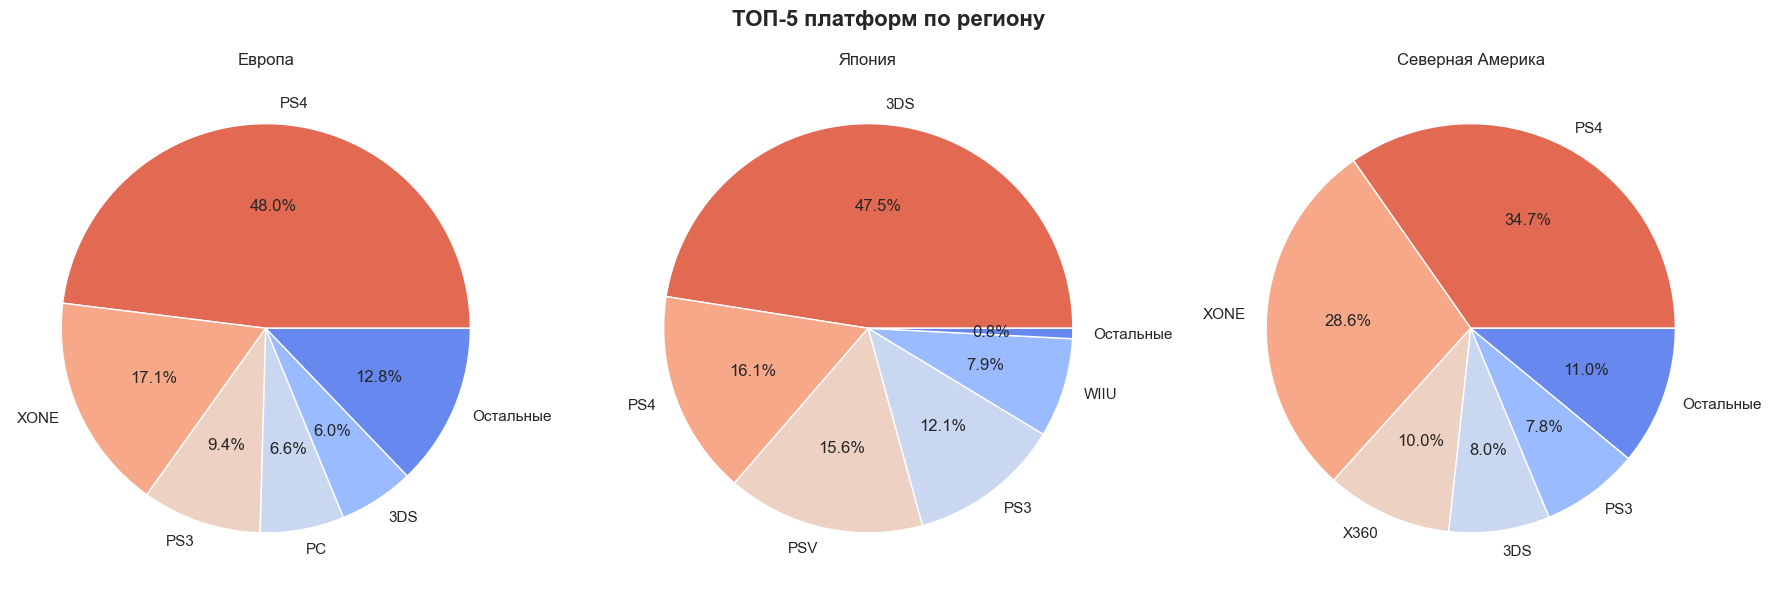

In [42]:
# Визуализация данных для анализа
fig, axes = plt.subplots(
    ncols=3,
    **FIGSIZE_SINGLE
)

for ax, region in zip(axes.flatten(), reg_top_platforms.columns):
    ax.pie(
        data=return_sales_by(reg_top_platforms[region]),
        x=region,
        labels='name',
        autopct='%1.1f%%',
        colors=sns.color_palette(PALETTE_CAT),
    )
    
    ax.set(title=ax_titles[region])
    
fig.suptitle(
    'ТОП-5 платформ по региону',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

##### Промежуточные выводы
- Согласно графикам можно отметить, что у каждого региона есть свои популярные платформы в порядке возрастания:
    - У Северной Америки - **`PS3, 3DS, X360, X-ONE, PS4`**
    - У Европы - **`Nintendo 3DS, PC, PS3, X-ONE, PS4`**
    - У Японии - **`WiiU, PS3, PSV, PS4, Nintendo 3DS`**

> Это может быть связано с некоторыми особенностями - культурой региона, нацеленность рекламных кампаний на конкретные регионы, исторически сформированные предпочтения у потребителей, уровнем дохода и др. Так, например, жители Японии отдают предпочтение продуктам производства своего региона

- Также графикам можно отметить, что **Япония приносит меньше всего продаж**, но при этом в их ТОП-5 входят уникальные конкретно для этого региона платформы

> Наиболее вероятно, что это может быть связано с потребительской культурой и населением региона (всего 124.5 млн. чел исходя из данных в открытых источниках)

### ТОП-5 по жанров по регионам
---

In [43]:
reg_top_genres = (
    df_actual
    .pivot_table(
        index='genre',
        values=['na_sales', 'eu_sales', 'jp_sales'],
        aggfunc='sum'
    )
    .rename(lambda x: x.capitalize())
)

reg_top_genres

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role_playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


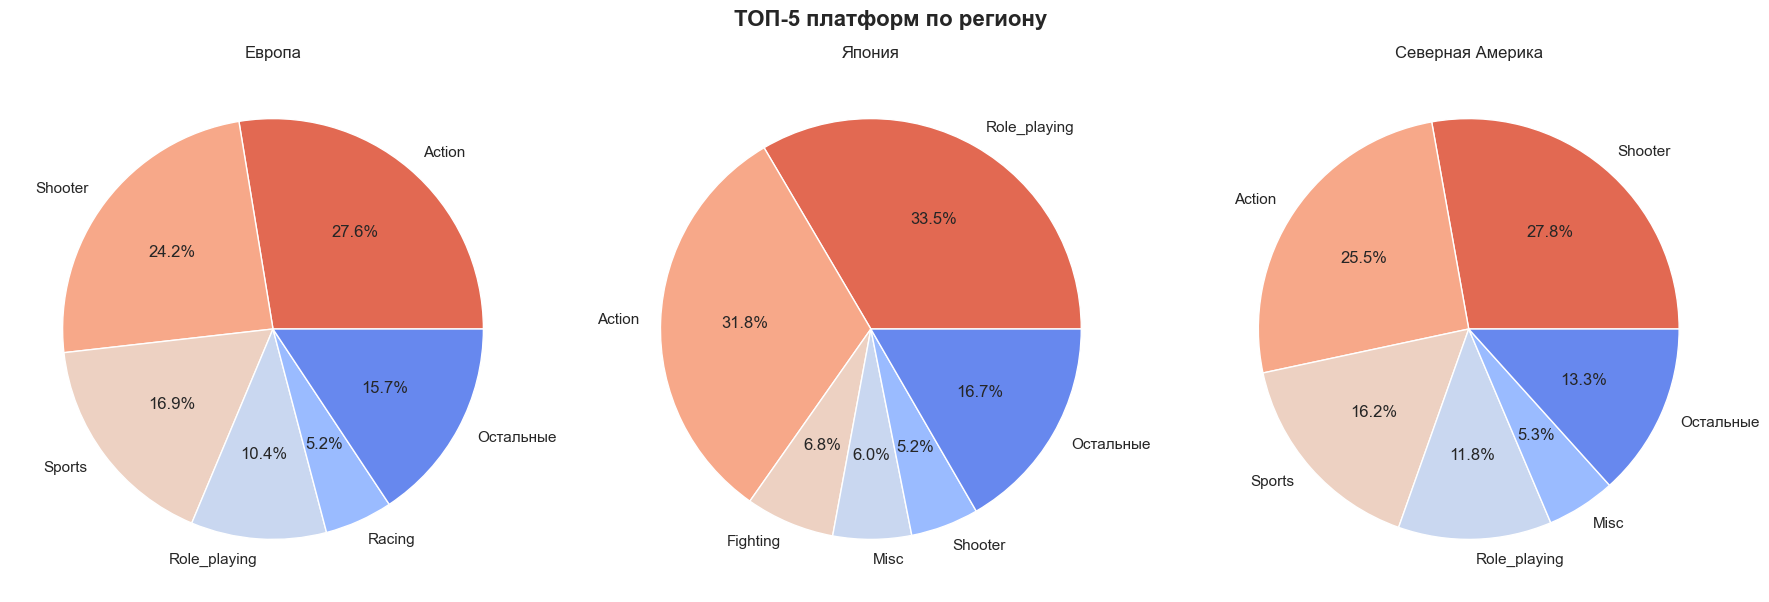

In [44]:
# Визуализация данных для анализа
fig, axes = plt.subplots(
    ncols=3,
    **FIGSIZE_SINGLE
)

for ax, region in zip(axes.flatten(), reg_top_genres.columns):
    ax.pie(
        data=return_sales_by(reg_top_genres[region]),
        x=region,
        labels='name',
        autopct='%1.1f%%',
        colors=sns.color_palette(PALETTE_CAT),
    )
    
    ax.set(title=ax_titles[region])
    
fig.suptitle(
    'ТОП-5 платформ по региону',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

##### Промежуточные выводы
- Согласно графикам можно отметить, что у каждого региона есть свои популярные жанры:
    - У Европы - **`Racing, RP, Sports, Shooter, Action`**
    - У Японии - **`Shooter, Misc, Fighting, Action, RP`**
    - У Северной Америки - **`Misc, RP, Sports, Action, Shooter`**
- Жанры **`Action, RP и Shooter одинаково популярны`** во всех регионах
- Можно выделить такие **уникальные жанры для Европы и Японии -  Racing и Fighting соответственно**

> Все это может быть связанно с особенностями культуры каждого региона и исторически сформированными вкусами

### Влияние рейтинга ESRB на продажи в регионах
---

In [45]:
# Формирование датафрейма
reg_top_ratings = (
    df_actual
    .pivot_table(
        index='rating',
        values=['na_sales', 'eu_sales', 'jp_sales'],
        aggfunc='sum'
    )
    .rename(lambda x: x.capitalize())
)

reg_top_ratings

,eu_sales,jp_sales,na_sales
rating,,,
Ao,0.00,0.00,0.00
E,58.06,8.94,50.74
E10,26.16,4.46,33.23
Ec,0.00,0.00,0.00
M,93.44,8.01,96.42
Other,58.95,56.90,64.72
Rp,0.00,0.00,0.00
T,34.07,14.78,38.95


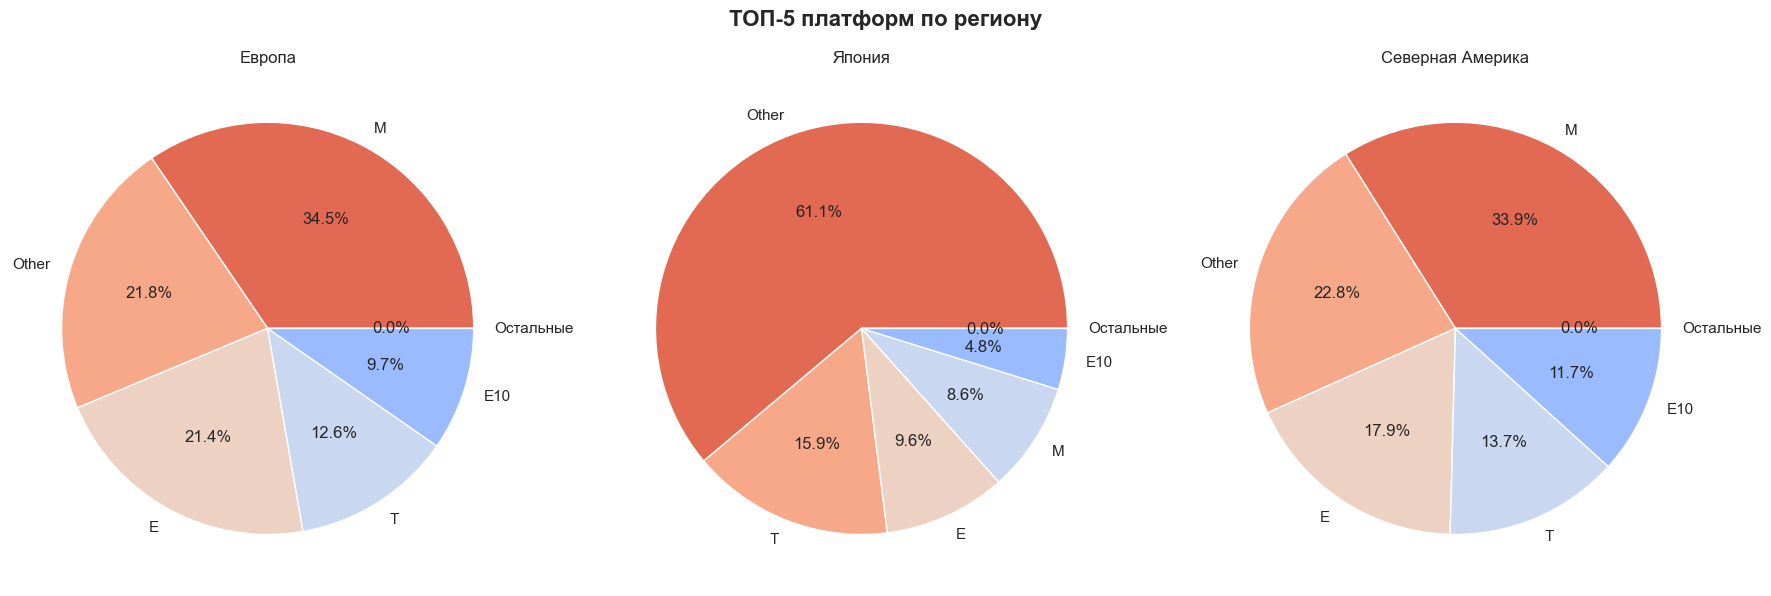

In [46]:
# Визуализация данных для анализа
fig, axes = plt.subplots(
    ncols=3,
    **FIGSIZE_SINGLE
)

for ax, region in zip(axes.flatten(), reg_top_ratings.columns):
    ax.pie(
        data=return_sales_by(reg_top_ratings[region]),
        x=region,
        labels='name',
        autopct='%1.1f%%',
        colors=sns.color_palette(PALETTE_CAT),
    )
    
    ax.set(title=ax_titles[region])
    
fig.suptitle(
    'ТОП-5 платформ по региону',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

##### Промежуточные выводы
- По всем регионам одинаково **`в ТОП-5 по продажам входят игры с рейтингами E(Everyone), M(Mature 17+), T(Teen), E10(Everyone 10+)и игры с рейтингами не для Северной Америки`**
- B Регионах Европа и Северная Америка самыми популярными оказались **`игры с рейтингом M(Mature 17+)`**, а в Японии **`игры с рейтингами не для Северной Америки`**
- Игры с рейтингами **`AO(Adults Only), RP(Rating Pending) и EC(Early Childhood)`** отсутствуют во всех регионах

> Очевидно, что в Европе и Северной Америке игры рейтингом M(Mature 17+) будут продаваться лучше всего, т.к. расчитаны на более взросулю аудиторию. Игры выпущенные не для Северной Америки(Other) также занимают солидную долю продаж по всем регионам сразу, особенно в Японии
>
> Игры с райтингами E(Everyone) и T(Teen) также могут быть достаточно популярными у пользователей, которые предпочитают игры рассчитаные более на широкую аудиторию

### Выводы
---
- **Cеверная Америка:** 
> В этом регионе отдают предпочтение платформе PS4 и играм жанра Shooter. А самыми продаваемые игры имеют рейтинг M
- **Европа:**
> Поотребители этого региона также отдают предпочтение платформе PS4, а играм - жанра Action. Самые продаваемые игры также имеют рейтинг M
- **Япония:**
> Это довольно закрытая культура, которая предпочитает платформы собственных производителей, где на первом месте идет Nintendo 3DS, а самыми популярные игры имеют жанр RP. Игры выпущенные не для Северной Америки здесь являются самыми продаваемыми
- Популярные **рейтинги по всем регионам идентичны** и отличаются лишь предпочтениями
- В **ТОП-2 по всем регионам вошел жанр Action**
- Самый высокий по продажам регион - **Северная Америка**

## Проверка гипотез
---

### Гипотеза №1
---
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

$$ H_0: \mu_{\text{XOne}} = \mu_{\text{PC}} $$

$$ H_1: \mu_{\text{XOne}} ≠ \mu_{\text{PC}} $$

In [47]:
pc_user_scores = df_actual.query('platform == "pc" & user_score >= 0')['user_score']
xone_user_scores = df_actual.query('platform == "xone" & user_score >= 0')['user_score']

results = st.ttest_ind(
    pc_user_scores,
    xone_user_scores,
    equal_var=False
)

alpha = 0.01

print(f'''
Среднее PC   - {np.mean(pc_user_scores) :.2f}
Среднее XONE - {np.mean(xone_user_scores) :.2f}
p-value      - {results.pvalue :.2f}
''')

if results.pvalue < alpha:
    print('Отвергаем H0: средние оценки пользователей PC и XONE отличаются')
else:
    print('Не отвергаем H0: средние оценки пользователей PC и XONE можно назвать равными')


Среднее PC   - 5.79
Среднее XONE - 6.20
p-value      - 0.03

Не отвергаем H0: средние оценки пользователей PC и XONE можно назвать равными


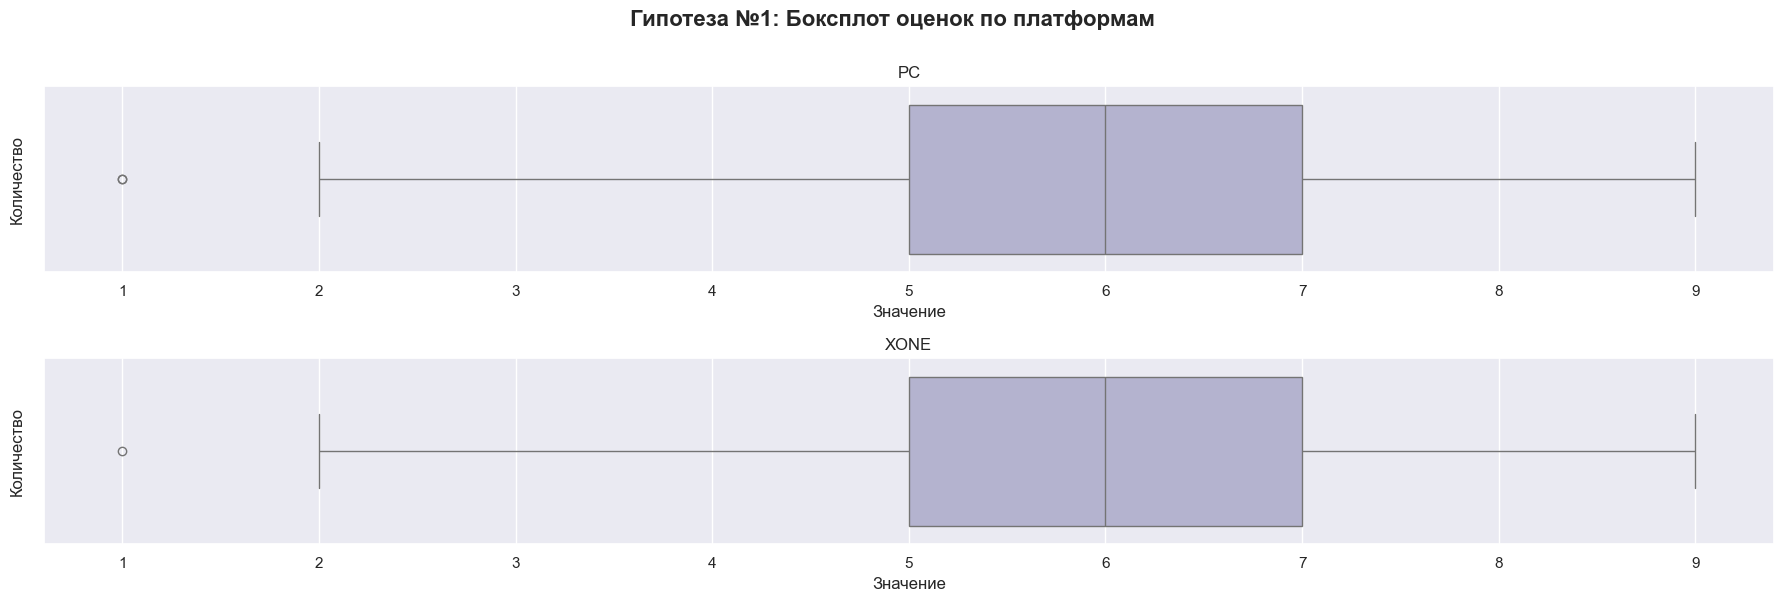

In [48]:
# Визуализация данных по гипотезе
fig, axes = plt.subplots(
    nrows=2,
    sharey=True,
    **FIGSIZE_SINGLE
)

for ax, df, plat in zip(axes, (pc_user_scores, xone_user_scores), ['PC', 'XONE']):
    sns.boxplot(
        data=df,
        orient='h',
        color=COLOR_SINGLE_BASIC,
        ax=ax
    )

    ax.set(
        title=plat,
        **LABELS_CAT
    )

fig.suptitle(
    'Гипотеза №1: Боксплот оценок по платформам',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

#### Вывод
---
> Для проверки гипотезы по оценкам пользователей двух платформ PC и XONE использовался двусторонний тест для независимых выборок.
>
> Результаты проверки гипотезы показали, что средние оценки пользователей по платформам отличаются. 
**Нулевую гипотезу отвергаем, результаты можно признать статистически значимыми.**

### Гипотеза №2
---
Средние пользовательские рейтинги жанров Action и Sports разные

$$ H_0: \mu_{\text{Action}} = \mu_{\text{Sports}} $$

$$ H_1: \mu_{\text{Action}} ≠ \mu_{\text{Sports}} $$

In [49]:
action_user_scores = df_actual.query('genre == "action" & user_score >= 0')['user_score']
sports_user_scores = df_actual.query('genre == "sports" & user_score >= 0')['user_score']

results = st.ttest_ind(
    action_user_scores,
    sports_user_scores,
    equal_var=False
)

alpha = 0.01

print(f'''
Среднее Action - {np.mean(action_user_scores) :.2f}
Среднее Sports - {np.mean(sports_user_scores) :.2f}
p-value        - {results.pvalue :.2f}
''')

if results.pvalue < alpha:
    print('Отвергаем H0: средние пользовательские оценки Action и Sports отличаются')
else:
    print('Не отвергаем H0: средние пользовательские оценки Action и Sports можно назвать равными')


Среднее Action - 6.23
Среднее Sports - 4.75
p-value        - 0.00

Отвергаем H0: средние пользовательские оценки Action и Sports отличаются


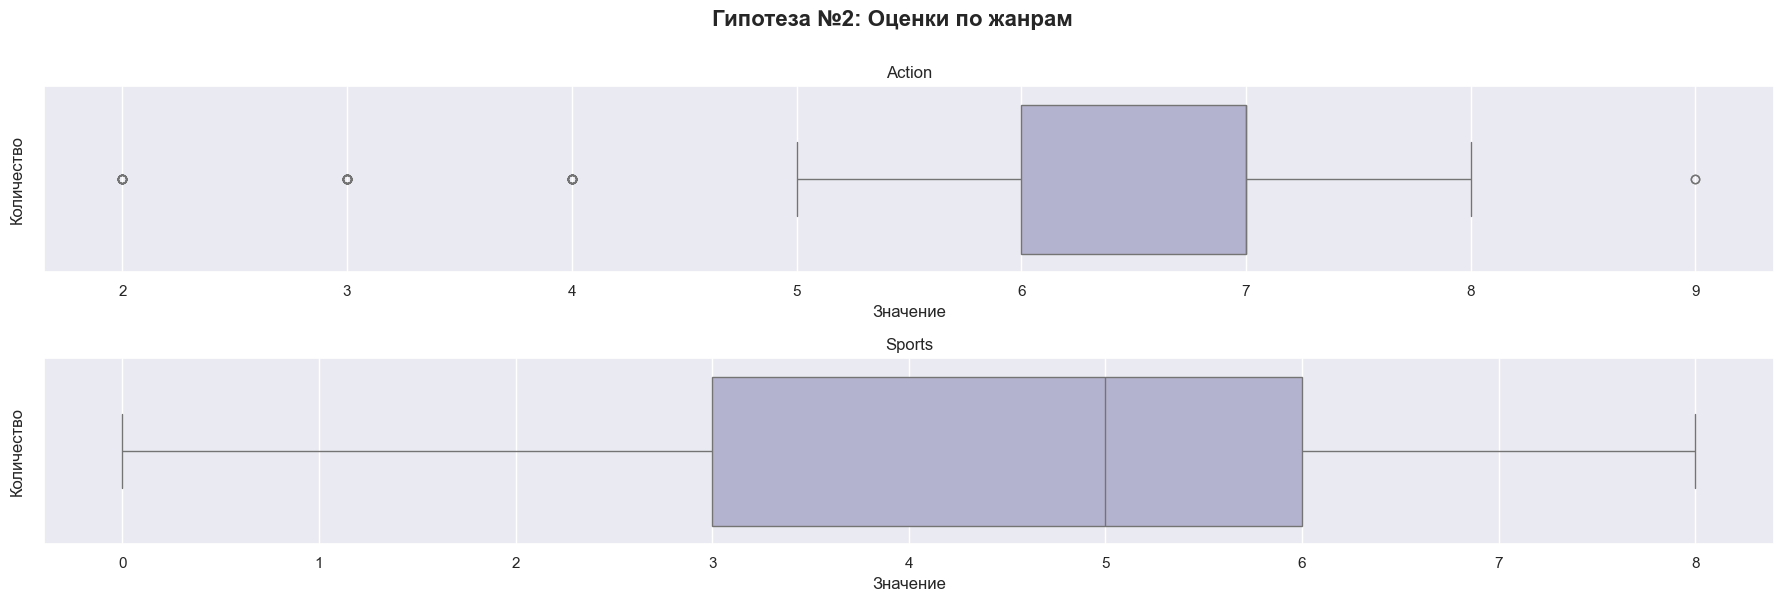

In [50]:
# Визуализация данных по гипотезе
fig, axes = plt.subplots(
    nrows=2,
    sharey=True,
    **FIGSIZE_SINGLE
)

for ax, df, genre in zip(axes, (action_user_scores, sports_user_scores), ['Action','Sports']):
    sns.boxplot(
        data=df,
        orient='h',
        color=COLOR_SINGLE_BASIC,
        ax=ax
    )

    ax.set(
        title=genre,
        **LABELS_CAT
    )

fig.suptitle(
    'Гипотеза №2: Оценки по жанрам',
    **FIG_SUPTITLE_KWARGS
)

plt.tight_layout()
plt.show()

#### Вывод
---
> Для проверки гипотезы по оценкам жанров Action и Sports использовался двусторонний тест для независимых выборок.
>
> Результаты проверки гипотезы показали, что средние оценки пользователей по жанрам можно назвать равными. 
**Нулевую гипотезу не отвергаем, результаты можно признать статистически значимыми.**

## Итоговые выводы
---

### Краткий обзор проведенной работы
> - Проведена предобработка данных - очищены выбивающихся и не влияющих на качество исследования данных значений, удалены, а также заменены отсутствующие данные где это было возможно
>
>
> - Проведен исследовательский анализ данных, который показал, что самые продаваемые игры за весь период с 1980 г. были у платформ: PS, DS, Wii, PS3, X360, PS2
>
>
> - За период 2014-2016 гг. определены следующие особенности по продажам:
    - самые актуальные игровые платформы: PS4, 3DS, XONE, WiiU, PS3, X360, PC, WII, PSV,PSP
    - самые популярные игровые жанры: Action, Sports, Shooter, Misc и Role Playing
    - самые перспективные игровые платформы: PS4, XONE и Nintendo 3DS
    - PC является, более-менее стабильной платформой
    - платформы Wii, PS3 и X360 находятся в стадии спада и/или заменяются новыми платформами
    - жизненный цикл платформ составляет 7 лет, а новые появляются каждые 5–7 лет
>
>
> - Были сформированы примерные портреты пользователей по каждому региону:
    - в Северной Америке предпочитают игры на платформе PS4 жанра Shooter и с рейтингом М
    - в Европе предпочитают игры на платформе PS4 жанра Action и с рейтингом М
    - в Японии предпочитают игры на Nintendo DS жанра RP и выпущенные не для Северной Америки
>
>
> - Проверены гипотезы, которые показали, что:
    - средние оценки пользователей PC и XONE можно назвать равными
    - средние пользовательские оценки по жанрам Action и Sports отличаются


### Главный вывод и рекомендации
> Следует ориентироваться на платформы с высоким потенциалом роста - PS4, Xbox One и Nintendo 3DS. PC также остаётся важной и стабильной платформой. Прредпочтительнее всего будет делать упор на продажи жанров Action, Shooter, Sports и RP, т.к. они занимают лидирующие позиции по продажам. И стоит обратить особое внимание на игры выпущенные не для Североной Америки и с рейтингом E(Для всех)
>
> Также необходимо учитывать региональные предпочтения: в Северной Америке и Европе популярная платформа PS4 в Японии — Nintendo, а жанры - Action, Shooter и RP. Это поможет сформировать более точные маркетинговые планы и планы продаж
>
> Знание о жизненном цикле платформ также поможет своевременно адаптировать стратегии продаж и продвижения

### Рекомендации по формированию базы
> - При формировании датафрейма следить за тем, что вносятся все данные без исключений
> - Настроить систему для загрузки данных таким образом, чтобы вносимые типы данных будут строго типизированными, например: дата - date, а оценки - int
> - Для минимизации потерь при заполнении года выпуска игры, автоматически подставлять его в похожую игру на другой платформе, где он может отсутствовать
> - В случае отсутствия оценок по играм предварительно провести исследование открытых источников на их наличие и заполнить, в ином случае - заполнить их нулевым значением
> - В случае отсутствия рейтинга у игры, также предварительно провести исследование открытых источников на их наличие и заполнить, в ином случае промаркировать типом Unkown или Other
> - При выгрузке исключать данные, срок которых превышает 5-10 лет для проведения анализа на актуальных данных